# This Python script was used to generate the machine learning models and figures used in the paper in the ROBIN RNA binders vs BindingDB classification. 

## Software License:

MIT License

Copyright (c) 2022 Yazdani et al. 

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.

## Jupyter notebook within the Anaconda platform was used in writing the following script. Python version 3.8.2 was used as the coding language. 
$\;\;\;\;\;\;$



![Python logo](https://upload.wikimedia.org/wikipedia/commons/thumb/c/c3/Python-logo-notext.svg/300px-Python-logo-notext.svg.png)

$\;\;\;\;\;\;$

In [1]:
# Check Python version
from platform import python_version
print("Python version:")
print(python_version())

Python version:
3.8.2


## macOS Catalina version 10.15.7 was used when running this code on the Anaconda platform. 

## This code was written with the following package versions. Please install the following packages with the mentioned versions for consistency of results.

### pandas --> version 1.4.1

In [2]:
# Check pandas version
import pandas as pd
print("pandas version:")
print(pd.__version__)

pandas version:
1.4.1


### numpy --> version 1.20.3

In [3]:
# Check numpy version
import numpy as np
print("numpy version:")
print(np.__version__)

numpy version:
1.20.3


### matplotlib --> version 3.4.3

In [4]:
# Check matplotlib version
import matplotlib as plt
print("matplotlib version:")
print(plt.__version__)

matplotlib version:
3.4.3


### seaborn --> version 0.11.2

In [5]:
# Check seaborn version
import seaborn as sns
print("seaborn version:")
print(sns.__version__)

seaborn version:
0.11.2


### sklearn --> version 1.0.2

In [6]:
# Check sklearn version
import sklearn
print("sklearn version:")
print(sklearn.__version__)

sklearn version:
1.0.2


### tensorflow --> version 2.3.1

In [7]:
# Check tensorflow version
import tensorflow as tf
print("tensorflow version:")
print(tf.__version__)

tensorflow version:
2.3.1


### keras --> version 2.4.0

In [8]:
# Check keras version
print("keras version:")
print(tf.keras.__version__)

keras version:
2.4.0


### shap --> version 0.37.0

In [9]:
# Check shap version
import shap
print("shap version:")
print(shap.__version__)

shap version:
0.37.0


In [10]:
# Remove at the end
# %load_ext pycodestyle_magic
# %pycodestyle_on
# %pycodestyle_off

# Classification of ROBIN RNA binders and BindingDB protein binders

## a) Classification of ROBIN RNA binders and BindingDB protein binders (No Augmentation)

In [14]:
# Import required packages for data processing
import pandas as pd
import numpy as np
import os

# Gets current directory of the jupyter notebook to use for directories of different files
notebook_dir = os.getcwd()

# Read in ROBIN RNA binders and BindingDB protein binders
df_ROBIN_RNA = pd.read_csv(notebook_dir + "/Mordred_files/Mordred_ROBIN_RNA_Binder_3D.csv")
df_BindingDB = pd.read_csv(notebook_dir + "/Mordred_files/Mordred_BindingDB_3D.csv")

# Remove the name column
df_ROBIN_RNA = df_ROBIN_RNA.drop('name', axis=1)
df_BindingDB = df_BindingDB.drop('name', axis=1)

# Delete duplicate rows that might still remain in the feature sets
df_ROBIN_RNA.drop_duplicates(keep="first", inplace=True)
df_BindingDB.drop_duplicates(keep="first", inplace=True)

# ________________________________________________

# Report the number of compounds in each library
print("Number of compounds in the BindingDB protein binding library:")
print(df_BindingDB.shape[0])
print()

print("Number of compounds in the ROBIN RNA Binding library:")
print(df_ROBIN_RNA.shape[0])

Number of compounds in the BindingDB protein binding library:
77678

Number of compounds in the ROBIN RNA Binding library:
1912


In [128]:
# Combine the two dataframes and conduct further processing 

"""
This cell might take a long time to run. This code does not have to be rerun if 
ROBIN_vs_BindingDB.csv is already saved in the ML_CSVs folder. 
"""

# Add libary names to the dataframes
df_ROBIN_RNA["Library"] = "RNA Binding"
df_BindingDB["Library"] = "Protein Binding" 

# Concat the dataframes and convert feature columns to numeric
df_all_2 = pd.concat([df_ROBIN_RNA, df_BindingDB])
df_all_2_columns = df_all_2.columns.tolist()[:-1]
df_all_2[df_all_2_columns] = df_all_2[df_all_2_columns].apply(pd.to_numeric,errors='coerce')

print("Done 1")

# Delete columns that have feature values missing in more than 40% of rows
df_all_2 = df_all_2.dropna(thresh=df_all_2.shape[0]*0.6, how='all',axis=1)

print("Done 2")

# Replace missing and infinity values by median of each column
df_all_2.replace([np.inf, -np.inf], np.nan, inplace=True)
df_all_2 = df_all_2.fillna(df_all_2.median(numeric_only=True))

# Reset the index
df_all_2 = df_all_2.reset_index(drop=True)

df_all_2

Done 1
Done 2


,ABC,ABCGG,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,SpMAD_A,LogEE_A,...,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2,Library
0,8.134854,7.731889,0,0,13.152542,2.292456,4.584911,13.152542,1.195686,3.294652,...,40.991311,212.978926,11.209417,152,14,52.0,58.0,5.194444,2.472222,RNA Binding
1,12.825381,10.895567,0,0,21.829826,2.405852,4.811703,21.829826,1.284107,3.747219,...,49.542495,233.068808,8.323886,528,25,84.0,97.0,5.805556,3.916667,RNA Binding
2,12.756432,10.434514,0,0,21.445449,2.430978,4.677100,21.445449,1.340341,3.730823,...,62.610127,210.079313,8.079974,435,22,86.0,101.0,4.055556,3.472222,RNA Binding
3,12.756432,10.386039,0,0,21.352964,2.421292,4.681454,21.352964,1.334560,3.730817,...,62.599178,210.079313,8.079974,441,22,86.0,101.0,4.055556,3.472222,RNA Binding
4,9.968445,8.888322,0,0,16.522521,2.394745,4.663162,16.522521,1.270963,3.500706,...,58.124309,193.056135,8.044006,247,16,66.0,76.0,4.194444,2.944444,RNA Binding
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79585,50.572365,33.803322,1,1,80.382517,2.463082,4.920462,80.382517,1.275913,5.084455,...,116.455462,918.252733,8.424337,20600,108,350.0,414.0,20.798611,13.125000,Protein Binding
79586,48.840314,33.349757,1,1,78.668310,2.461681,4.916747,78.668310,1.289644,5.052189,...,115.990083,869.290498,8.048986,18809,102,336.0,398.0,18.986111,12.875000,Protein Binding
79587,52.266458,33.232614,0,2,84.944901,2.459249,4.911151,84.944901,1.306845,5.118811,...,118.547785,988.275972,8.235633,23446,111,360.0,427.0,19.097222,13.708333,Protein Binding
79588,55.082955,36.129435,0,2,88.799904,2.488147,4.945299,88.799904,1.305881,5.186933,...,129.984451,963.392009,7.585764,25999,118,384.0,461.0,20.180556,14.208333,Protein Binding


In [129]:
# Save file to the ML_CSVs folder so the preprocessing code does not have to be rerun multiple times
"""
Skip this cell if ROBIN_vs_BindingDB.csv is already saved in the ML_CSVs folder. 
"""
df_all_2.to_csv(os.getcwd()[0:-18] + "Supplemental_files/ML_CSVs/ROBIN_vs_BindingDB.csv", 
                index=False)

In [171]:
"""
If ROBIN_vs_BindingDB.csv is already saved in the ML_CSVs folder, skip the previous two cells
and read the file ROBIN_vs_BindingDB.csv here. 
"""
df_all_2 = pd.read_csv(os.getcwd()[0:-18] + "Supplemental_files/ML_CSVs/ROBIN_vs_BindingDB.csv")
df_all_2

,ABC,ABCGG,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,SpMAD_A,LogEE_A,...,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2,Library
0,8.134854,7.731889,0,0,13.152542,2.292456,4.584911,13.152542,1.195686,3.294652,...,40.991311,212.978926,11.209417,152,14,52.0,58.0,5.194444,2.472222,RNA Binding
1,12.825381,10.895567,0,0,21.829826,2.405852,4.811703,21.829826,1.284107,3.747219,...,49.542495,233.068808,8.323886,528,25,84.0,97.0,5.805556,3.916667,RNA Binding
2,12.756432,10.434514,0,0,21.445449,2.430978,4.677100,21.445449,1.340341,3.730823,...,62.610127,210.079313,8.079974,435,22,86.0,101.0,4.055556,3.472222,RNA Binding
3,12.756432,10.386039,0,0,21.352964,2.421292,4.681454,21.352964,1.334560,3.730817,...,62.599178,210.079313,8.079974,441,22,86.0,101.0,4.055556,3.472222,RNA Binding
4,9.968445,8.888322,0,0,16.522521,2.394745,4.663162,16.522521,1.270963,3.500706,...,58.124309,193.056135,8.044006,247,16,66.0,76.0,4.194444,2.944444,RNA Binding
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79585,50.572365,33.803322,1,1,80.382517,2.463082,4.920462,80.382517,1.275913,5.084455,...,116.455462,918.252733,8.424337,20600,108,350.0,414.0,20.798611,13.125000,Protein Binding
79586,48.840314,33.349757,1,1,78.668310,2.461681,4.916747,78.668310,1.289644,5.052189,...,115.990083,869.290498,8.048986,18809,102,336.0,398.0,18.986111,12.875000,Protein Binding
79587,52.266458,33.232614,0,2,84.944901,2.459249,4.911151,84.944901,1.306845,5.118811,...,118.547785,988.275972,8.235633,23446,111,360.0,427.0,19.097222,13.708333,Protein Binding
79588,55.082955,36.129435,0,2,88.799904,2.488147,4.945299,88.799904,1.305881,5.186933,...,129.984451,963.392009,7.585764,25999,118,384.0,461.0,20.180556,14.208333,Protein Binding


In [199]:
# Data preparation and standardization before the LASSO logisitic regression and neural network models

# Import standardization package
from sklearn.preprocessing import StandardScaler

# Prepare the features
X_all_2 = df_all_2.values[:, :-1]
X_all_2 = X_all_2.astype('float64')
X_all_2 = StandardScaler().fit_transform(X_all_2)
print("Shape of the X_all_2 matrix:")
print(X_all_2.shape)
print()

# Prepare the labels
y_all_2 = df_all_2.values[:, -1]
y_all_2 = y_all_2.tolist()
y_all_2 = [1 if x == "RNA Binding" else x for x in y_all_2]
y_all_2 = [0 if x == "Protein Binding" else x for x in y_all_2]
y_all_2 = np.array(y_all_2)
y_all_2 = y_all_2.astype(float)
print("Shape of the y_all_2 labels array:")
print(y_all_2.shape)

Shape of the X_all_2 matrix:
(79590, 1670)



1:80: E501 line too long (102 > 79 characters)


Shape of the y_all_2 labels array:
(79590,)


In [203]:
# Take 90% of the data to cross validation (stratified) and save the remaining 10% for a final holdout(test) set.

# Import splitting package
from sklearn.model_selection import train_test_split

X_all_2_CV, X_all_2_holdout, y_all_2_CV, y_all_2_holdout = train_test_split(X_all_2, y_all_2,
                                                                            shuffle=True, test_size=0.1,
                                                                            random_state=10, stratify=y_all_2)

print("Shape of X_all_2 matrix:")
print(X_all_2.shape)
print()

print("Shape of the y_all_2 labels array:")
print(y_all_2.shape)
print()

print("Shape of X_all_2_CV matrix:")
print(X_all_2_CV.shape)
print()

print("Shape of the y_all_2_CV labels array:")
print(y_all_2_CV.shape)
print()

print("Shape of X_all_2_holdout matrix:")
print(X_all_2_holdout.shape)
print()

print("Shape of the y_all_2_holdout labels array:")
print(y_all_2_holdout.shape)

1:80: E501 line too long (113 > 79 characters)
6:80: E501 line too long (93 > 79 characters)
7:80: E501 line too long (104 > 79 characters)
8:80: E501 line too long (110 > 79 characters)


Shape of X_all_2 matrix:
(79590, 1670)

Shape of the y_all_2 labels array:
(79590,)

Shape of X_all_2_CV matrix:
(71631, 1670)

Shape of the y_all_2_CV labels array:
(71631,)

Shape of X_all_2_holdout matrix:
(7959, 1670)

Shape of the y_all_2_holdout labels array:
(7959,)


Fold 1:
Train and Test sets shapes:
(64467, 1670)
(64467,)
(7164, 1670)
(7164,)
Training set AUPRC:
0.4
Test set AUPRC:
0.37

Num_nonzero_LR_coeffs:
282
*******************

Fold 2:
Train and Test sets shapes:
(64468, 1670)
(64468,)
(7163, 1670)
(7163,)
Training set AUPRC:
0.4
Test set AUPRC:
0.34

Num_nonzero_LR_coeffs:
269
*******************

Fold 3:
Train and Test sets shapes:
(64468, 1670)
(64468,)
(7163, 1670)
(7163,)
Training set AUPRC:
0.4
Test set AUPRC:
0.32

Num_nonzero_LR_coeffs:
283
*******************

Fold 4:
Train and Test sets shapes:
(64468, 1670)
(64468,)
(7163, 1670)
(7163,)
Training set AUPRC:
0.39
Test set AUPRC:
0.4

Num_nonzero_LR_coeffs:
277
*******************

Fold 5:
Train and Test sets shapes:
(64468, 1670)
(64468,)
(7163, 1670)
(7163,)
Training set AUPRC:
0.4
Test set AUPRC:
0.4

Num_nonzero_LR_coeffs:
286
*******************

Fold 6:
Train and Test sets shapes:
(64468, 1670)
(64468,)
(7163, 1670)
(7163,)
Training set AUPRC:
0.4
Test set AUPRC:
0.34

Num_n

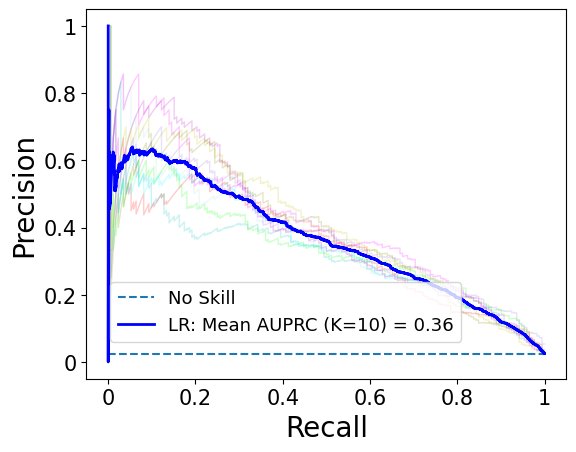

1:80: E501 line too long (114 > 79 characters)
8:1: E402 module level import not at top of file
12:80: E501 line too long (89 > 79 characters)
17:80: E501 line too long (81 > 79 characters)
18:80: E501 line too long (94 > 79 characters)
27:80: E501 line too long (93 > 79 characters)
33:80: E501 line too long (89 > 79 characters)
35:80: E501 line too long (89 > 79 characters)
51:80: E501 line too long (86 > 79 characters)
53:80: E501 line too long (84 > 79 characters)
59:80: E501 line too long (84 > 79 characters)
82:45: W291 trailing whitespace
83:80: E501 line too long (99 > 79 characters)
102:80: E501 line too long (105 > 79 characters)


In [214]:
# This cell draws a PR curve with cross validation on the ROBIN RNA binders vs BindingDB classification with LASSO

# Import ML packages
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold

# Import and reset matplotlib
import matplotlib.pyplot as plt
plt.style.use('default')

# Import required packages for the PR curve
from sklearn.metrics import average_precision_score, precision_recall_curve

# Set seed value
RANDOM_SEED = 5
np.random.seed(RANDOM_SEED)

# Define the logisitc regression model
clf = LogisticRegression(C=0.01, penalty='l1', solver='liblinear',
                         max_iter=100, random_state=RANDOM_SEED, class_weight='balanced')

# Split into 10 stratified folds for cross validation
cv = StratifiedKFold(10, random_state=5, shuffle=True)

# Define the colors to be used for the 10 folds as they are drawn on the PR curve
colors = ["lightblue", "r", "c", "m", "y", "lime", "mediumpurple", "olive", "aqua", "magenta",
          "skyblue", "yellowgreen", "gold", "tan", "silver"]

# Cross validation for loop
LR_y_real = []
LR_y_proba = []
num = 0
for train, test in cv.split(X_all_2_CV, y_all_2_CV):

    # Fit the model on the training set and predict probabilities for the train and test sets
    LR_fit = clf.fit(X_all_2_CV[train], y_all_2_CV[train])
    LR_train_probas = clf.predict_proba(X_all_2_CV[train])
    LR_test_probas = clf.predict_proba(X_all_2_CV[test])

    # Compute PR curve
    precision, recall, _ = precision_recall_curve(y_all_2_CV[test], LR_test_probas[:, 1])

    # Plotting each individual PR Curve and append them to LR_y_real and LR_y_proba lists
    plt.plot(recall, precision, color=colors[num], lw=1, alpha=0.2)
    LR_y_real.append(y_all_2_CV[test])
    LR_y_proba.append(LR_test_probas[:, 1])

    # Update num to keep track of fold number
    num += 1

    # Print Shapes and average precision score for each training and test round
    print("Fold " + str(num) + ":")
    print("Train and Test sets shapes:")
    print(X_all_2_CV[train].shape)
    print(y_all_2_CV[train].shape)
    print(X_all_2_CV[test].shape)
    print(y_all_2_CV[test].shape)
    print("Training set AUPRC:")
    print(round(average_precision_score(y_all_2_CV[train], LR_train_probas[:, 1]), 2))
    print("Test set AUPRC:")
    print(round(average_precision_score(y_all_2_CV[test], LR_test_probas[:, 1]), 2))
    print()

    # Get the LR coefficients and sort them
    LR_coeffs = clf.coef_[0].tolist()

    # Calculate the number of positive and negative logistic regression coefficients
    Num_nonzero_LR_coeffs = 0
    for item in LR_coeffs:
        if item != 0:
            Num_nonzero_LR_coeffs += 1
    print("Num_nonzero_LR_coeffs:")
    print(Num_nonzero_LR_coeffs)
    
    print()
    print("*******************")
    print()

# Plot the no skill line on the bottom of the PR curve
no_skill = len(y_all_2_CV[y_all_2_CV == 1]) / len(y_all_2_CV)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')

# Concatenate all LR_y_real and LR_y_proba arrays for drawing of the mean curve
LR_y_real = np.concatenate(LR_y_real)
LR_y_proba = np.concatenate(LR_y_proba)

# Calculate mean precision and recall for drawing the PR curve in the next step
LR_precision, LR_recall, _ = precision_recall_curve(LR_y_real, LR_y_proba)

# Plot the mean PR curve
plt.plot(LR_recall, LR_precision, color='b', 
         label=r'LR: Mean AUPRC (K=10) = %0.2f' % (average_precision_score(LR_y_real, LR_y_proba)),
         lw=2, alpha=1)

# Set aspect ratio
axes = plt.gca()
axes.set_aspect(0.77)

# Remove the gridlines
plt.grid(visible=False)

# Set x-axis and y-axis ticks
tick_list = [0, 0.2, 0.4, 0.6, 0.8, 1]
plt.xticks(tick_list, tick_list, fontsize=15)
plt.yticks(tick_list, tick_list, fontsize=15)
plt.xlabel('Recall', fontsize=20)
plt.ylabel('Precision', fontsize=20)
plt.legend(loc=(0.05, 0.1), fontsize=13)

# Save the PR curve
plt.savefig(os.getcwd()[0:-18] + '/Figures/PRC_ROBIN_RNA_vs_BindingDB.png', dpi=600, bbox_inches="tight")

# Show plot
plt.show()

In [215]:
# Train the model on the entire CV set and test on the holdout set define earlier with relevant performance metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import matthews_corrcoef


# Define the model
clf = LogisticRegression(C=0.01, penalty='l1', solver='liblinear',
                         max_iter=100, random_state=RANDOM_SEED, class_weight='balanced')

# Fit the model on the training set and predict probabilities for the train and test sets
LR_fit = clf.fit(X_all_2_CV, y_all_2_CV)
prediction_probs = clf.predict_proba(X_all_2_holdout)[:, 1]
prediction_classes = clf.predict(X_all_2_holdout)

cm = confusion_matrix(y_all_2_holdout, prediction_classes)
print("Confusion matrix on the holdout set:")
print(cm)
print()

AUPRC_score_holdout = average_precision_score(y_all_2_holdout, prediction_probs)
print("AUPRC score on the holdout set:")
print(round(AUPRC_score_holdout, 2))
print()

f1_score_holdout = f1_score(y_all_2_holdout, prediction_classes)
print("F1 score on the holdout set:")
print(round(f1_score_holdout, 2))
print()

AUROC_score_holdout = roc_auc_score(y_all_2_holdout, prediction_probs)
print("AUROC score on the holdout set:")
print(round(AUROC_score_holdout, 2))
print()

cohen_kappa_score_holdout = cohen_kappa_score(y_all_2_holdout, prediction_classes)
print("Cohen’s kappa score on the holdout set:")
print(round(cohen_kappa_score_holdout, 2))
print()

matthews_corrcoef_holdout = matthews_corrcoef(y_all_2_holdout, prediction_classes)
print("Matthews correlation coefficient on the holdout set:")
print(round(matthews_corrcoef_holdout, 2))
print()

1:80: E501 line too long (115 > 79 characters)
10:80: E501 line too long (89 > 79 characters)
12:80: E501 line too long (89 > 79 characters)
22:80: E501 line too long (80 > 79 characters)
37:80: E501 line too long (82 > 79 characters)
42:80: E501 line too long (82 > 79 characters)


Confusion matrix on the holdout set:
[[6797  971]
 [  23  168]]

AUPRC score on the holdout set:
0.36

F1 score on the holdout set:
0.25

AUROC score on the holdout set:
0.93

Cohen’s kappa score on the holdout set:
0.22

Matthews correlation coefficient on the holdout set:
0.33



## b) Classification of augmented ROBIN RNA binders and BindingDB protein binders

In [218]:
# In this part of the code, we classify augmented ROBIN and BindingDB protein binders.

# Read in the ROBIN RNA binders, ROBIN augmented library, and BindingDB protein binders
df_ROBIN_RNA = pd.read_csv(notebook_dir + "/Mordred_files/Mordred_ROBIN_RNA_Binder_3D.csv")
df_Augmented_ROBIN = pd.read_csv(notebook_dir + "/Mordred_files/Mordred_Augmented_ROBIN_RNA_3D.csv")
df_BindingDB = pd.read_csv(notebook_dir + "/Mordred_files/Mordred_BindingDB_3D.csv")

# ______________________________________________

# Report the number of compounds in each library that will be used in machine learning
print("Number of compounds in the BindingDB protein binding library:")
print(df_BindingDB.shape[0])
print()

print("Number of compounds in the Augmented_ROBIN library:")
print(df_Augmented_ROBIN.shape[0])
print()

print("Number of compounds in the ROBIN RNA Binding library:")
print(df_ROBIN_RNA.shape[0])
print()

1:80: E501 line too long (86 > 79 characters)
3:80: E501 line too long (87 > 79 characters)
4:80: E501 line too long (91 > 79 characters)
5:80: E501 line too long (100 > 79 characters)
6:80: E501 line too long (84 > 79 characters)
10:80: E501 line too long (86 > 79 characters)


Number of compounds in the BindingDB protein binding library:
77678

Number of compounds in the Augmented_ROBIN library:
59272

Number of compounds in the ROBIN RNA Binding library:
1912



### Machine Learning Strategy:

Two matrices wil be utilized to train the augmented ROBIN RNA binders vs BindingDB classifiers.

Matrix 1 (df_all_3): This matrix is comprised of augmented ROBIN RNA binders and BindingDB protein binders. This is the matrix whose standardized chemical descriptor values will be used throughout for training and testing the dataset. 

Matrix 2 (df_all_4): This matrix only has experimentally-derived ROBIN RNA binders and BindingDB protein binders and their features. This matrix does not have any computational augmentation at any step. This matrix is used for splitting the dataset and defining the train and test sets in each round of cross-validation. Only compound names of this matrix are used in the analysis steps. 

### 10-fold Cross-Validation Strategy Step by Step:

1. Matrix df_all_4 (matrix 2) is split in a stratified manner (same class balance as the original dataset) into 10 folds. Splitting of the matrix that is not augmented ensures only experimenal compounds end up in each test set. 
2. In each round of cross validation, one of the 10 folds is assigned as a test set.
3. Compounds in each of the test sets are first extracted. Then, BindingDB compounds of the test set are taken out of df_all_3. For ROBIN RNA binders in each test set, the compounds themselves and all their analogues are taken out of df_all_3 as well to prevent any data leakage from train to test set.
4. The new df_all_3 with the test set compounds and their analogues taken out is trained on with the machine learning models. Models are tested on test set compounds extracted from the experimental df_all_4 matrix. All features are standardized initially in the df_all_3 matrix so rows of compound features are exclusively extracted from the df_all_3 matrix.

** Note: As a result of this cross validation strategy, the train and test set have different class balances; therefore, higher performance of the model on the training set might not be indicative of overfitting.


In [391]:
# Combine the two dataframes and conduct further processing

"""
This cell might take a long time to run. This code does not have to be rerun if 
Augmented_ROBIN_RNA_vs_BindingDB.csv is already saved in the ML_CSVs folder. 
"""

# Assigning a library name to the two dataframes
df_BindingDB["library"] = "Protein Binding"
df_Augmented_ROBIN["library"] = "RNA Binding"

# Concat the two dataframes
df_all_3 = pd.concat([df_BindingDB, df_Augmented_ROBIN])

# Get the list of all feature columns in the dataset and coerce them to numeric
df_all_3_columns = df_all_3.columns.tolist()[1:-1]
df_all_3[df_all_3_columns] = df_all_3[df_all_3_columns].apply(pd.to_numeric, errors='coerce')

print("Done1")
# Delete columns that have feature values missing in more than 60% of compounds
df_all_3 = df_all_3.dropna(thresh=df_all_3.shape[0]*0.6, how='all', axis=1)

print("Done2")
# Replace missing and infinity values by median of each column
df_all_3.replace([np.inf, -np.inf], np.nan, inplace=True)
df_all_3 = df_all_3.fillna(df_all_3.median(numeric_only=True))

# Reset the index
df_all_3 = df_all_3.reset_index(drop=True)
df_all_3

Done1
Done2


,name,ABC,ABCGG,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,SpMAD_A,...,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2,library
0,BindingDB 1,23.500933,17.128253,0,1,39.126253,2.449710,4.899419,39.126253,1.304208,...,65.746982,475.113943,8.638435,2677,48,158.0,185.0,9.111111,6.611111,Protein Binding
1,BindingDB 2,25.938492,21.292421,0,0,42.785600,2.481870,4.833920,42.785600,1.258400,...,78.135576,462.288243,6.420670,3199,56,170.0,196.0,12.222222,7.611111,Protein Binding
2,BindingDB 3,34.106053,26.768431,0,0,53.764435,2.606065,5.083513,53.764435,1.250336,...,97.664975,603.210482,8.377923,6771,81,240.0,293.0,17.152778,9.027778,Protein Binding
3,BindingDB 4,35.118950,28.599221,0,0,58.671259,2.458774,4.845653,58.671259,1.275462,...,97.749671,633.305015,7.115787,7753,73,232.0,270.0,16.166667,10.361111,Protein Binding
4,BindingDB 5,58.658929,36.298970,0,3,95.411397,2.463021,4.920324,95.411397,1.307005,...,127.125246,1036.444773,7.456437,32848,126,404.0,480.0,21.430556,15.430556,Protein Binding
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136945,NCGC00348216-02,18.632065,13.622823,0,2,30.303493,2.502899,5.005799,30.303493,1.262646,...,58.470263,331.310776,5.258901,1764,31,122.0,139.0,7.277778,5.305556,RNA Binding
136946,NCGC00348216-02,18.632065,13.622823,0,2,30.303493,2.502899,5.005799,30.303493,1.262646,...,58.470263,331.310776,5.258901,1764,31,122.0,139.0,7.277778,5.305556,RNA Binding
136947,NCGC00348216-02,18.632065,13.622823,0,2,30.303493,2.502899,5.005799,30.303493,1.262646,...,58.470263,331.310776,5.258901,1764,31,122.0,139.0,7.277778,5.305556,RNA Binding
136948,NCGC00348216-02,18.632065,13.622823,0,2,30.303493,2.502899,5.005799,30.303493,1.262646,...,58.470263,331.310776,5.258901,1764,31,122.0,139.0,7.277778,5.305556,RNA Binding


In [392]:
# Save the preprocessed dataframe so the data does not have to reprocessed with every notebook
"""
Skip this cell if Augmented_ROBIN_RNA_vs_BindingDB.csv is already saved in the ML_CSVs folder. 
"""
df_all_3.to_csv(os.getcwd()[0:-18] + "/Supplemental_files/ML_CSVs/Augmented_ROBIN_RNA_vs_BindingDB.csv", index=False)

In [15]:
# Load back the preprocessed dataframe
"""
If Augmented_ROBIN_RNA_vs_BindingDB.csv is already saved in the ML_CSVs folder, skip the previous two cells
and read the file Augmented_ROBIN_RNA_vs_BindingDB.csv here.
"""
df_all_3 = pd.read_csv(os.getcwd()[0:-18] + "/Supplemental_files/ML_CSVs/Augmented_ROBIN_RNA_vs_BindingDB.csv")
df_all_3

,name,ABC,ABCGG,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,SpMAD_A,...,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2,library
0,BindingDB 1,23.500933,17.128253,0,1,39.126253,2.449710,4.899419,39.126253,1.304208,...,65.746982,475.113943,8.638435,2677,48,158.0,185.0,9.111111,6.611111,Protein Binding
1,BindingDB 2,25.938492,21.292421,0,0,42.785600,2.481870,4.833920,42.785600,1.258400,...,78.135576,462.288243,6.420670,3199,56,170.0,196.0,12.222222,7.611111,Protein Binding
2,BindingDB 3,34.106053,26.768431,0,0,53.764435,2.606065,5.083513,53.764435,1.250336,...,97.664975,603.210482,8.377923,6771,81,240.0,293.0,17.152778,9.027778,Protein Binding
3,BindingDB 4,35.118950,28.599221,0,0,58.671259,2.458774,4.845653,58.671259,1.275462,...,97.749671,633.305015,7.115787,7753,73,232.0,270.0,16.166667,10.361111,Protein Binding
4,BindingDB 5,58.658929,36.298970,0,3,95.411397,2.463021,4.920324,95.411397,1.307005,...,127.125246,1036.444773,7.456437,32848,126,404.0,480.0,21.430556,15.430556,Protein Binding
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136945,NCGC00348216-02,18.632065,13.622823,0,2,30.303493,2.502899,5.005799,30.303493,1.262646,...,58.470263,331.310776,5.258901,1764,31,122.0,139.0,7.277778,5.305556,RNA Binding
136946,NCGC00348216-02,18.632065,13.622823,0,2,30.303493,2.502899,5.005799,30.303493,1.262646,...,58.470263,331.310776,5.258901,1764,31,122.0,139.0,7.277778,5.305556,RNA Binding
136947,NCGC00348216-02,18.632065,13.622823,0,2,30.303493,2.502899,5.005799,30.303493,1.262646,...,58.470263,331.310776,5.258901,1764,31,122.0,139.0,7.277778,5.305556,RNA Binding
136948,NCGC00348216-02,18.632065,13.622823,0,2,30.303493,2.502899,5.005799,30.303493,1.262646,...,58.470263,331.310776,5.258901,1764,31,122.0,139.0,7.277778,5.305556,RNA Binding


In [16]:
# Data preparation and standardization before the LASSO logisitic regression and neural network models
# df_all_3 is the augmented dataset combined
from sklearn.preprocessing import StandardScaler

# Prepare the features
X_all_3 = df_all_3.values[:, 1:-1]
X_all_3 = X_all_3.astype('float64')
sc = StandardScaler()
sc.fit(X_all_3)
X_all_3 = sc.transform(X_all_3)
print("Shape of X_all_3 matrix:")
print(X_all_3.shape)
print()

# Prepare the labels
y_all_3 = df_all_3.values[:, -1]
y_all_3 = y_all_3.tolist()
y_all_3 = [1 if x == "RNA Binding" else x for x in y_all_3]
y_all_3 = [0 if x == "Protein Binding" else x for x in y_all_3]
y_all_3 = np.array(y_all_3)
y_all_3 = y_all_3.astype(float)
print("Shape of the y_all_3 labels array:")
print(y_all_3.shape)

Shape of X_all_3 matrix:
(136950, 1665)

Shape of the y_all_3 labels array:
(136950,)


In [18]:
# Convert standardized df_all_3 back to array since Pandas operations will be used on this dataframe later
# Also, add the name and label columns back in as they will be used later
df_all_3_feature_columns = df_all_3.columns.tolist()[1:-1]
df_all_3_name_label_standardized = pd.DataFrame(X_all_3, columns=df_all_3_feature_columns)
df_all_3_compound_names = pd.Series(df_all_3["name"].tolist(), name="name")
df_all_3_name_label_standardized = pd.concat([df_all_3_compound_names, df_all_3_name_label_standardized], axis=1)
df_all_3_labels = pd.Series(y_all_3.tolist(), name="label")
df_all_3_name_label_standardized = pd.concat([df_all_3_name_label_standardized, df_all_3_labels], axis=1)
df_all_3_name_label_standardized

,name,ABC,ABCGG,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,SpMAD_A,...,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2,label
0,BindingDB 1,0.000439,-0.111584,-0.278799,0.165314,0.016145,-0.108591,0.256236,0.016145,0.313330,...,-0.504487,0.206542,0.698959,-0.066442,0.011580,-0.006540,-0.017132,-0.090579,-0.002598,0.0
1,BindingDB 2,0.188268,0.342033,-0.278799,-0.665259,0.189288,0.232278,-0.122524,0.189288,-0.747360,...,0.092436,0.153261,-1.091928,-0.058146,0.297307,0.134062,0.094676,0.354191,0.257996,0.0
2,BindingDB 3,0.817632,0.938555,-0.278799,-0.665259,0.708756,1.548618,1.320790,0.708756,-0.934088,...,1.033427,0.738685,0.488591,-0.001375,1.190204,0.954239,1.080615,1.059072,0.627171,0.0
3,BindingDB 4,0.895682,1.137989,-0.278799,-0.665259,0.940924,-0.012521,-0.054677,0.940924,-0.352287,...,1.037508,0.863704,-0.530608,0.014232,0.904477,0.860504,0.846836,0.918096,0.974630,0.0
4,BindingDB 5,2.709590,1.976750,-0.278799,1.826461,2.679298,0.032496,0.377122,2.679298,0.378095,...,2.452921,2.538441,-0.255527,0.413073,2.797419,2.875795,2.981344,1.670630,2.295696,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136945,NCGC00348216-02,-0.374739,-0.493443,-0.278799,0.995888,-0.401307,0.455166,0.871393,-0.401307,-0.649056,...,-0.855104,-0.390850,-2.030078,-0.080953,-0.595591,-0.428345,-0.484691,-0.352675,-0.342818,1.0
136946,NCGC00348216-02,-0.374739,-0.493443,-0.278799,0.995888,-0.401307,0.455166,0.871393,-0.401307,-0.649056,...,-0.855104,-0.390850,-2.030078,-0.080953,-0.595591,-0.428345,-0.484691,-0.352675,-0.342818,1.0
136947,NCGC00348216-02,-0.374739,-0.493443,-0.278799,0.995888,-0.401307,0.455166,0.871393,-0.401307,-0.649056,...,-0.855104,-0.390850,-2.030078,-0.080953,-0.595591,-0.428345,-0.484691,-0.352675,-0.342818,1.0
136948,NCGC00348216-02,-0.374739,-0.493443,-0.278799,0.995888,-0.401307,0.455166,0.871393,-0.401307,-0.649056,...,-0.855104,-0.390850,-2.030078,-0.080953,-0.595591,-0.428345,-0.484691,-0.352675,-0.342818,1.0


In [19]:
# Preproccess df_all_4 and save so the preprocessing does not have to be rerun
# df_all_4 is the non-augmented dataset which will be used for testing the performance of the augmented set in each fold of cross validation

"""
This cell might take a long time to run. This code does not have to be rerun if 
ROBIN_RNA_vs_BindingDB_used_in_Augmentation.csv is already saved in the ML_CSVs folder. 
"""

# Add libary names to the dataframes
df_ROBIN_RNA["library"] = "RNA Binding"
df_BindingDB["library"] = "Protein Binding" 


df_all_4 = pd.concat([df_ROBIN_RNA, df_BindingDB])

df_all_3_features = df_all_3.columns.tolist()
df_all_4 = df_all_4[df_all_3_features]

df_all_4_features = df_all_4.columns.tolist()[1:-1]
df_all_4[df_all_4_features] = df_all_4[df_all_4_features].apply(pd.to_numeric, errors='coerce')

print("Done1")


# Replace missing and infinity values by median of each column
df_all_4.replace([np.inf, -np.inf], np.nan, inplace=True)
df_all_4 = df_all_4.fillna(df_all_4.median(numeric_only=True))


print("Done2")

# Reset the index
df_all_4 = df_all_4.reset_index(drop=True)

df_all_4.to_csv(os.getcwd()[0:-18] + "/Supplemental_files/ML_CSVs/ROBIN_RNA_vs_BindingDB_used_in_Augmentation.csv", index=False)

df_all_4

Done1
Done2


,name,ABC,ABCGG,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,SpMAD_A,...,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2,library
0,0054-0090,8.134854,7.731889,0,0,13.152542,2.292456,4.584911,13.152542,1.195686,...,40.991311,212.978926,11.209417,152,14,52.0,58.0,5.194444,2.472222,RNA Binding
1,0096-0280,12.825381,10.895567,0,0,21.829826,2.405852,4.811703,21.829826,1.284107,...,49.542495,233.068808,8.323886,528,25,84.0,97.0,5.805556,3.916667,RNA Binding
2,0109-0002,12.756432,10.434514,0,0,21.445449,2.430978,4.677100,21.445449,1.340341,...,62.610127,210.079313,8.079974,435,22,86.0,101.0,4.055556,3.472222,RNA Binding
3,0109-0045,12.756432,10.386039,0,0,21.352964,2.421292,4.681454,21.352964,1.334560,...,62.599178,210.079313,8.079974,441,22,86.0,101.0,4.055556,3.472222,RNA Binding
4,0133-0036,9.968445,8.888322,0,0,16.522521,2.394745,4.663162,16.522521,1.270963,...,58.124309,193.056135,8.044006,247,16,66.0,76.0,4.194444,2.944444,RNA Binding
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79585,BindingDB 77674,50.572365,33.803322,1,1,80.382517,2.463082,4.920462,80.382517,1.275913,...,116.455462,918.252733,8.424337,20600,108,350.0,414.0,20.798611,13.125000,Protein Binding
79586,BindingDB 77675,48.840314,33.349757,1,1,78.668310,2.461681,4.916747,78.668310,1.289644,...,115.990083,869.290498,8.048986,18809,102,336.0,398.0,18.986111,12.875000,Protein Binding
79587,BindingDB 77676,52.266458,33.232614,0,2,84.944901,2.459249,4.911151,84.944901,1.306845,...,118.547785,988.275972,8.235633,23446,111,360.0,427.0,19.097222,13.708333,Protein Binding
79588,BindingDB 77677,55.082955,36.129435,0,2,88.799904,2.488147,4.945299,88.799904,1.305881,...,129.984451,963.392009,7.585764,25999,118,384.0,461.0,20.180556,14.208333,Protein Binding


In [23]:
"""
If ROBIN_RNA_vs_BindingDB_used_in_Augmentation.csv is already saved in the ML_CSVs folder, skip the previous cell
and read the file Augmented_ROBIN_RNA_vs_BindingDB.csv here. 
"""

# Load back df_all_4 and standardize
df_all_4 = pd.read_csv(os.getcwd()[0:-18] + "/Supplemental_files/ML_CSVs/ROBIN_RNA_vs_BindingDB_used_in_Augmentation.csv")
#prepare the features
X_all_4 = df_all_4.values[:, :-1]
print("Shape of X_all_4 matrix:")
print(X_all_4.shape)
print()

#prepare the labels
y_all_4 = df_all_4.values[:,-1]
y_all_4 = y_all_4.tolist()
y_all_4 = [1 if x=="RNA Binding" else x for x in y_all_4]
y_all_4 = [0 if x=="Protein Binding" else x for x in y_all_4]
y_all_4 = np.array(y_all_4)
y_all_4 = y_all_4.astype(float)
print("Shape of the y_all_4 labels array:")
print(y_all_4.shape)


Shape of X_all_4 matrix:
(79590, 1666)

Shape of the y_all_4 labels array:
(79590,)


In [24]:
# Take 90% of the data to cross validation (stratified) and save the remaining 10% for a final holdout(test) set. 

from sklearn.model_selection import train_test_split

X_all_4_CV, X_all_4_holdout, y_all_4_CV, y_all_4_holdout = train_test_split(X_all_4, y_all_4,shuffle = True, test_size=0.1, random_state=10, stratify = y_all_4)

print ("Shape of X_all_4 matrix:")
print (X_all_4.shape)
print ()

print ("Shape of the y_all_4 labels array:")
print (y_all_4.shape)
print ()

print ("Shape of X_all_4_CV matrix:")
print (X_all_4_CV.shape)
print ()

print ("Shape of the y_all_4_CV labels array:")
print (y_all_4_CV.shape)
print ()

print ("Shape of X_all_4_holdout matrix:")
print (X_all_4_holdout.shape)
print ()

print ("Shape of the y_all_4_holdout labels array:")
print (y_all_4_holdout.shape)




Shape of X_all_4 matrix:
(79590, 1666)

Shape of the y_all_4 labels array:
(79590,)

Shape of X_all_4_CV matrix:
(71631, 1666)

Shape of the y_all_4_CV labels array:
(71631,)

Shape of X_all_4_holdout matrix:
(7959, 1666)

Shape of the y_all_4_holdout labels array:
(7959,)


In [25]:
# Load in the dictionary that maps each ROBIN RNA binder to 30 analogues for augmentation 
# This dictionary will be used to prevent data leakage during cross-validation to exclude analogoes of test cases in the train set
df_ROBIN_Augment_map = pd.read_csv(os.getcwd()[0:-18] + "Supplemental_files/ROBIN_Plus_Dictionary.csv")
df_ROBIN_Augment_map_names_og = df_ROBIN_Augment_map["Name"].tolist()
df_ROBIN_Augment_map_names_JPLUS = df_ROBIN_Augment_map["ROBIN_Plus_Name"].tolist()
df_ROBIN_Augment_map_names_augmented = []
for item in df_ROBIN_Augment_map_names_JPLUS:
    df_ROBIN_Augment_map_names_augmented.append(item.split(";"))
ROBIN_Augment_dict = {}
for i in range(len(df_ROBIN_Augment_map_names_og)):
    ROBIN_Augment_dict[df_ROBIN_Augment_map_names_og[i]] =  df_ROBIN_Augment_map_names_augmented[i]
ROBIN_Augment_dict 

{'0054-0090': ['0054-0090',
  '0054-0090',
  '0054-0090',
  '0054-0090',
  '0054-0090',
  '0054-0090',
  '0054-0090',
  '0054-0090',
  '0054-0090',
  '0054-0090',
  '0054-0090',
  '0054-0090',
  '0054-0090',
  '0054-0090',
  '0054-0090',
  '0054-0090',
  '0054-0090',
  '0054-0090',
  '0054-0090',
  '0054-0090',
  '0054-0090',
  '0054-0090',
  '0054-0090',
  '0054-0090',
  '0054-0090',
  '0054-0090',
  '0054-0090',
  '0054-0090',
  '0054-0090',
  '0054-0090'],
 '0096-0280': ['Compound 44213',
  'Compound 44233',
  'Compound 42717',
  'Compound 44236',
  'Compound 42678',
  'Compound 44228',
  'Compound 44570',
  'Compound 43804',
  'Compound 36904',
  'Compound 16788',
  'Compound 42730',
  'Compound 44551',
  'Compound 44212',
  'Compound 40949',
  'Compound 37855',
  'Compound 44569',
  'Compound 41940',
  'Compound 44648',
  'Compound 42700',
  'Compound 42573',
  'Compound 44229',
  'Compound 40914',
  'Compound 45240',
  'Compound 39634',
  'Compound 45739',
  'Compound 41883',
  '

In [219]:
# Remove warnings
import warnings
warnings.filterwarnings('ignore')

## Next step does the splitting as described earlier and saves each train and test set for each fold in the ML_CSVs folder. This step will ensure the splitting does not have be to be redone after the initial run of the next cell. 

In [24]:
## Save the folds used for cross validation as CSVs for faster execution when code is run again

"""
This cell might take a long time to run. This code does not have to be rerun if 
CSVs of all folds are already saved in the Augmented_ROBIN_vs_BindingDB_Stratified_Folds folder within the 
ML_CSVs folder. 
"""


# Split into 10 folds in a stratified manner 
cv = StratifiedKFold(10, random_state = 5, shuffle = True)

num = 1
for train, test in cv.split(X_all_4_CV, y_all_4_CV):
    
    # Print fold number 
    print ("Fold " + str(num) + ":")

    # RNA compounds to exclude fron the training set
    test_set_compounds = X_all_4_CV[test][:, 0].tolist()
    test_set_RNA_compounds = [item for item in test_set_compounds if item[0:9] != "BindingDB"]
    test_set_RNA_compounds_expanded = []
    for item in test_set_RNA_compounds:
        test_set_RNA_compounds_expanded.append(item)
        item_expanded = ROBIN_Augment_dict[item]
        for thing in item_expanded:
            test_set_RNA_compounds_expanded.append(thing)
    test_set_RNA_compounds_expanded_set = list(set(test_set_RNA_compounds_expanded))

    # BindingDB compounds to exclude fron the training set
    test_set_BindingDB = [item for item in test_set_compounds if item[0:9] == "BindingDB"]

    # BindingDB and RNA binders to be excluded from the train set combined into one set
    test_set_RNA_expanded_and_BindingDB = test_set_BindingDB + test_set_RNA_compounds_expanded_set
    
    # Remove from df_all_3_name_label_standardized_train BindingDB compounds from the test set
    # Also remove from df_all_3_name_label_standardized_train tes set ROBIN RNA binders and their analogues
    df_all_3_name_label_standardized_train = df_all_3_name_label_standardized.loc[~df_all_3_name_label_standardized['name'].isin(test_set_RNA_expanded_and_BindingDB)]
    # df_all_3_name_label_standardized_train is the train set
    
    # Print shape of the train set and the number of protein and RNA binders within it
    print("Shape of Augmented Train set:")
    print (df_all_3_name_label_standardized_train.shape)
    df_all_3_name_label_standardized_train_labels = df_all_3_name_label_standardized_train["label"].tolist()
    print("Number of protein binders:")
    print(int(len(df_all_3_name_label_standardized_train_labels) - sum(df_all_3_name_label_standardized_train_labels)))
    print("Number of RNA binders:")
    print(int(sum(df_all_3_name_label_standardized_train_labels)))
    print()

    # Extract from df_all_3_name_label_standardized the test set compounds belonging to BindingDB and ROBIN RNA binders
    test_set_RNA_and_BindingDB = test_set_RNA_compounds + test_set_BindingDB
    df_all_3_name_label_standardized_test = df_all_3_name_label_standardized.loc[df_all_3_name_label_standardized['name'].isin(test_set_RNA_and_BindingDB)]
    df_all_3_name_label_standardized_test.drop_duplicates(subset=['name'], keep="first", inplace=True)
    # df_all_3_name_label_standardized_test is the test set
    # Test set compounds are extracted again from df_all_3_name_label_standardized to ensure standardization of train and test sets are the same
    
    # Print shape of the test set and the number of protein and RNA binders within it
    print("Shape of test set:")
    print(df_all_3_name_label_standardized_test.shape)
    df_all_3_name_label_standardized_test_labels = df_all_3_name_label_standardized_test["label"].tolist()
    print("Number of protein binders:")
    print(int(len(df_all_3_name_label_standardized_test_labels) - sum(df_all_3_name_label_standardized_test_labels)))
    print("Number of RNA binders:")
    print(int(sum(df_all_3_name_label_standardized_test_labels)))

    # Get the feature values and labels from the pandas dataframes
    X_3_all_Augmented_train = df_all_3_name_label_standardized_train.iloc[:, 1:-1]
    y_3_all_Augmented_train = df_all_3_name_label_standardized_train.iloc[:, -1]

    X_3_all_Augmented_test = df_all_3_name_label_standardized_test.iloc[:, 1:-1]
    y_3_all_Augmented_test = df_all_3_name_label_standardized_test.iloc[:, -1]
    
    # Save in Augmented_ROBIN_vs_BindingDB_Stratified_Folds folder within the ML_CSVs folder
    save_dir = os.getcwd()[0:-18] + "Supplemental_files/ML_CSVs/Augmented_ROBIN_vs_BindingDB_Stratified_Folds/" + "fold_" + str(num) + "/"
    
    # Save the files in their corresponding CSVs
    X_3_all_Augmented_train.to_csv(save_dir + "X_train" + ".csv", index=False)
    y_3_all_Augmented_train.to_csv(save_dir + "y_train" + ".csv", index=False)
    X_3_all_Augmented_test.to_csv(save_dir + "X_test" + ".csv", index=False)
    y_3_all_Augmented_test.to_csv(save_dir + "y_test" + ".csv", index=False)
    
    #Update num
    num += 1
    
    print("*****************")

Fold 1:
Shape of Augmented Train set:
(123920, 1667)
Number of protein binders:
70687
Number of RNA binders:
53233

Shape of test set:
(7164, 1667)
Number of protein binders:
6991
Number of RNA binders:
173
*****************
Fold 2:
Shape of Augmented Train set:
(123920, 1667)
Number of protein binders:
70687
Number of RNA binders:
53233

Shape of test set:
(7163, 1667)
Number of protein binders:
6991
Number of RNA binders:
172
*****************
Fold 3:
Shape of Augmented Train set:
(124107, 1667)
Number of protein binders:
70687
Number of RNA binders:
53420

Shape of test set:
(7163, 1667)
Number of protein binders:
6991
Number of RNA binders:
172
*****************
Fold 4:
Shape of Augmented Train set:
(123747, 1667)
Number of protein binders:
70687
Number of RNA binders:
53060

Shape of test set:
(7163, 1667)
Number of protein binders:
6991
Number of RNA binders:
172
*****************
Fold 5:
Shape of Augmented Train set:
(123917, 1667)
Number of protein binders:
70687
Number of RNA 

In [14]:
"""
If folds are already saved in the Augmented_ROBIN_vs_BindingDB_Stratified_Folds folder within the ML_CSVs folder, 
skip the previous cell and read each fold's train and test sets here. 
"""

# Read the saved folds back in 

for k in range(1,11):
    
    print (k)
    
    exec(f'fold_{k}_X_train = pd.read_csv(os.getcwd()[0:-18] + "Supplemental_files/ML_CSVs/Augmented_ROBIN_vs_BindingDB_Stratified_Folds/" + "fold_" + str(k) + "/" + "X_train.csv")')
  
    exec(f'fold_{k}_y_train = pd.read_csv(os.getcwd()[0:-18] + "Supplemental_files/ML_CSVs/Augmented_ROBIN_vs_BindingDB_Stratified_Folds/" + "fold_" + str(k) + "/" + "y_train.csv")')

    exec(f'fold_{k}_X_test = pd.read_csv(os.getcwd()[0:-18] + "Supplemental_files/ML_CSVs/Augmented_ROBIN_vs_BindingDB_Stratified_Folds/" + "fold_" + str(k) + "/" + "X_test.csv")')

    exec(f'fold_{k}_y_test = pd.read_csv(os.getcwd()[0:-18] + "Supplemental_files/ML_CSVs/Augmented_ROBIN_vs_BindingDB_Stratified_Folds/" + "fold_" + str(k) + "/" + "y_test.csv")')

# Example file read from fold_1_X_train
fold_1_X_train

1
2
3
4
5
6
7
8
9
10


,ABC,ABCGG,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,SpMAD_A,LogEE_A,...,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
0,0.000439,-0.111584,-0.278799,0.165314,0.016145,-0.108591,0.256236,0.016145,0.313330,0.202345,...,0.176911,-0.504487,0.206542,0.698959,-0.066442,0.011580,-0.006540,-0.017132,-0.090579,-0.002598
1,0.188268,0.342033,-0.278799,-0.665259,0.189288,0.232278,-0.122524,0.189288,-0.747360,0.472602,...,0.089225,0.092436,0.153261,-1.091928,-0.058146,0.297307,0.134062,0.094676,0.354191,0.257996
2,0.817632,0.938555,-0.278799,-0.665259,0.708756,1.548618,1.320790,0.708756,-0.934088,1.225211,...,1.540032,1.033427,0.738685,0.488591,-0.001375,1.190204,0.954239,1.080615,1.059072,0.627171
3,2.074223,1.720536,1.566434,0.165314,1.989031,0.025135,0.367165,1.989031,-0.180046,2.279372,...,2.087598,1.937162,1.977005,0.280144,0.218413,2.154533,2.219654,2.290170,1.492921,1.727457
4,2.070406,1.672341,1.566434,0.165314,1.995452,0.018215,0.357695,1.995452,-0.130171,2.275359,...,2.019751,1.933381,1.960492,0.079438,0.221083,2.118817,2.196220,2.259677,1.480015,1.738315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123915,-0.374739,-0.493443,-0.278799,0.995888,-0.401307,0.455166,0.871393,-0.401307,-0.649056,-0.443391,...,-0.315413,-0.855104,-0.390850,-2.030078,-0.080953,-0.595591,-0.428345,-0.484691,-0.352675,-0.342818
123916,-0.374739,-0.493443,-0.278799,0.995888,-0.401307,0.455166,0.871393,-0.401307,-0.649056,-0.443391,...,-0.315413,-0.855104,-0.390850,-2.030078,-0.080953,-0.595591,-0.428345,-0.484691,-0.352675,-0.342818
123917,-0.374739,-0.493443,-0.278799,0.995888,-0.401307,0.455166,0.871393,-0.401307,-0.649056,-0.443391,...,-0.315413,-0.855104,-0.390850,-2.030078,-0.080953,-0.595591,-0.428345,-0.484691,-0.352675,-0.342818
123918,-0.374739,-0.493443,-0.278799,0.995888,-0.401307,0.455166,0.871393,-0.401307,-0.649056,-0.443391,...,-0.315413,-0.855104,-0.390850,-2.030078,-0.080953,-0.595591,-0.428345,-0.484691,-0.352675,-0.342818


## LASSO Logistic Regression Model:

Fold 1:
Confusion matrix on the test set:
[[60632 10055]
 [ 4994 48239]]
Confusion matrix on the test set:
[[6002  989]
 [  22  151]]
F1 score test:
0.23
F1 score train:
0.87

Test AVG precision score:
0.37
Train AVG precision score:
0.92

Num_nonzero_LR_coeffs:
286

*******************

Fold 2:
Confusion matrix on the test set:
[[60700  9987]
 [ 5179 48054]]
Confusion matrix on the test set:
[[5986 1005]
 [  21  151]]
F1 score test:
0.23
F1 score train:
0.86

Test AVG precision score:
0.36
Train AVG precision score:
0.92

Num_nonzero_LR_coeffs:
275

*******************

Fold 3:
Confusion matrix on the test set:
[[60663 10024]
 [ 5137 48283]]
Confusion matrix on the test set:
[[6039  952]
 [  20  152]]
F1 score test:
0.24
F1 score train:
0.86

Test AVG precision score:
0.34
Train AVG precision score:
0.92

Num_nonzero_LR_coeffs:
288

*******************

Fold 4:
Confusion matrix on the test set:
[[60633 10054]
 [ 4980 48080]]
Confusion matrix on the test set:
[[5964 1027]
 [  19  153]]

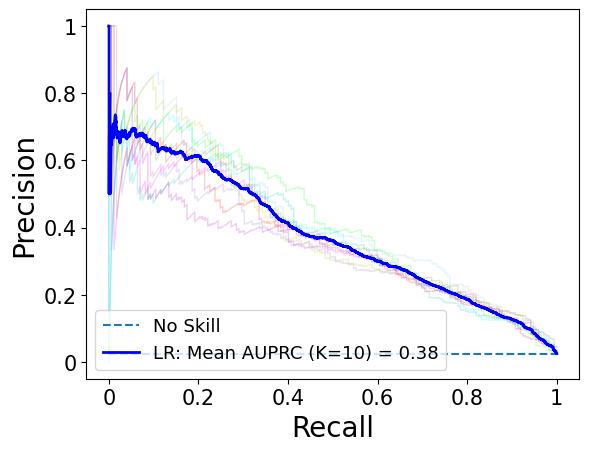

9:80: E501 line too long (89 > 79 characters)
11:80: E501 line too long (81 > 79 characters)
12:80: E501 line too long (83 > 79 characters)
39:80: E501 line too long (93 > 79 characters)
45:5: E303 too many blank lines (2)
46:80: E501 line too long (95 > 79 characters)
48:80: E501 line too long (89 > 79 characters)
53:80: E501 line too long (89 > 79 characters)
67:80: E501 line too long (86 > 79 characters)
71:80: E501 line too long (80 > 79 characters)
74:80: E501 line too long (89 > 79 characters)
74:86: E231 missing whitespace after ','
76:80: E501 line too long (91 > 79 characters)
76:88: E231 missing whitespace after ','
82:80: E501 line too long (84 > 79 characters)
89:36: W291 trailing whitespace
105:80: E501 line too long (83 > 79 characters)
109:14: E127 continuation line over-indented for visual indent
109:80: E501 line too long (103 > 79 characters)
110:14: E127 continuation line over-indented for visual indent
130:80: E501 line too long (88 > 79 characters)


In [250]:
# Perform cross-validation on LASSO logistic regression model

# Import required packages for the PR curve
from sklearn.metrics import average_precision_score, precision_recall_curve, confusion_matrix
from sklearn.metrics import f1_score

# Define the logisitc regression model
clf = LogisticRegression(C=0.005, penalty='l1', solver='liblinear',
                         max_iter=100, random_state=RANDOM_SEED, class_weight='balanced')

# Define the colors to be used for the 10 folds as they are drawn on the PR curve
colors = ["lightblue", "r", "c", "m", "y", "lime", "mediumpurple", "olive", "aqua",
          "magenta", "skyblue", "yellowgreen", "gold", "tan", "silver"]

# Cross-validation for loop
LR_y_real = []
LR_y_proba = []
num = 0
for k in range(1, 11):

    # Print fold number
    print("Fold " + str(num+1) + ":")

    # Read in the fetures and labels for the train and test sets read earlier
    X_train = vars()['fold_' + str(k) + "_X_train"]
    y_train = vars()['fold_' + str(k) + "_y_train"]
    X_test = vars()['fold_' + str(k) + "_X_test"]
    y_test = vars()['fold_' + str(k) + "_y_test"]

    # Update num
    num += 1

    # Convert the dataframes to numpy arrays for machine learning
    X_3_all_Augmented_train = X_train.values
    y_3_all_Augmented_train = y_train.values
    X_3_all_Augmented_test = X_test.values
    y_3_all_Augmented_test = y_test.values

    # Fit the model on the training set and predict probabilities for the train and test sets
    LR_fit = clf.fit(X_3_all_Augmented_train, y_3_all_Augmented_train)
    LR_test_probas = clf.predict_proba(X_3_all_Augmented_test)
    LR_train_probas = clf.predict_proba(X_3_all_Augmented_train)


    # Compute PR and area under the curve
    precision, recall, _ = precision_recall_curve(y_3_all_Augmented_test, LR_test_probas[:, 1])

    # Plotting each individual PR Curve and append them to LR_y_real and LR_y_proba lists
    plt.plot(recall, precision, color=colors[num], lw=1, alpha=0.2)
    LR_y_real.append(y_3_all_Augmented_test)
    LR_y_proba.append(LR_test_probas[:, 1])

    # Get model class predictions instead of probabilities to show the confusion matrices
    prediction_classes_test = clf.predict(X_3_all_Augmented_test)
    prediction_classes_train = clf.predict(X_3_all_Augmented_train)

    # Draw confusion matrix of the model performance on the train set
    cm = confusion_matrix(y_3_all_Augmented_train, prediction_classes_train)
    print("Confusion matrix on the test set:")
    print(cm)

    # Draw confusion matrix of the model performance on the test set
    cm = confusion_matrix(y_3_all_Augmented_test, prediction_classes_test)
    print("Confusion matrix on the test set:")
    print(cm)

    # Print F1 score and average prevision score for train and test sets in each round
    print("F1 score test:")
    print(round(f1_score(y_3_all_Augmented_test, prediction_classes_test), 2))
    print("F1 score train:")
    print(round(f1_score(y_3_all_Augmented_train, prediction_classes_train), 2))
    print()
    print("Test AVG precision score:")
    print(round(average_precision_score(y_3_all_Augmented_test, LR_test_probas[:, 1]),2))
    print("Train AVG precision score:")
    print(round(average_precision_score(y_3_all_Augmented_train, LR_train_probas[:, 1]),2))
    print()

    # Get the LR coefficients and sort them
    LR_coeffs = clf.coef_[0].tolist()

    # Calculate the number of positive and negative logistic regression coefficients
    Num_nonzero_LR_coeffs = 0
    for item in LR_coeffs:
        if item != 0:
            Num_nonzero_LR_coeffs += 1

    # Report number of nonzero LR coefficients
    print("Num_nonzero_LR_coeffs:") 
    print(Num_nonzero_LR_coeffs)

    print()
    print("*******************")
    print()

# Plot the no skill line on the bottom of the PR curve
no_skill = len(y_all_2_CV[y_all_2_CV == 1]) / len(y_all_2_CV)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')

# Concatenate all LR_y_real and LR_y_proba arrays for drawing of the mean curve
LR_y_real = np.concatenate(LR_y_real)
LR_y_proba = np.concatenate(LR_y_proba)

# Calculate mean precision and recall for drawing the PR curve in the next step
LR_precision, LR_recall, thresholds = precision_recall_curve(LR_y_real, LR_y_proba)

# Plot the mean PR curve
plt.plot(LR_recall, LR_precision, color='b',
             label=r'LR: Mean AUPRC (K=10) = %0.2f' % (average_precision_score(LR_y_real, LR_y_proba)),
             lw=2, alpha=1)

# Set aspect ratio
axes = plt.gca()
axes.set_aspect(0.75)

# Remove the gridlines
plt.grid(visible=False)


# Set x-axis and y-axis ticks
tick_list = [0, 0.2, 0.4, 0.6, 0.8, 1]
plt.xticks(tick_list, tick_list, fontsize=15)
plt.yticks(tick_list, tick_list, fontsize=15)
plt.xlabel('Recall', fontsize=20)
plt.ylabel('Precision', fontsize=20)
plt.legend(loc="lower left", fontsize=13)


# save the PR curve
plt.savefig(os.getcwd()[0:-18] + '/Figures/PRC_Augmented_ROBIN_RNA_vs_BindingDB_LR.png',
            dpi=600, bbox_inches="tight")

# Show plot
plt.show()

In [252]:
# Calculate highest and lowest coefficients of the LASSO logistic regression model

# Train the logistic regression model on the entire dataset this time
clf = LogisticRegression(C=0.005, penalty='l1', solver='liblinear', 
                         max_iter=100, random_state=RANDOM_SEED, class_weight='balanced').fit(X_all_3, y_all_3)

# Get the LR coefficients and sort them
LR_coeffs = clf.coef_[0].tolist()
sorted_LR_coeffs = sorted(LR_coeffs, reverse=True)

# Calculate the number of positive and negative logistic regression coefficients
Num_positive_LR_coeffs = 0
for item in LR_coeffs:
    if item > 0:
        Num_positive_LR_coeffs += 1
Num_negative_LR_coeffs = 0
for item in LR_coeffs:
    if item < 0:
        Num_negative_LR_coeffs += 1

# Get the positive and negative coefficients as lists
sorted_LR_coeffs_top = sorted_LR_coeffs[0:Num_positive_LR_coeffs]
sorted_LR_coeffs_buttom = sorted_LR_coeffs[-1*Num_negative_LR_coeffs:][::-1]

# Get features of the df_all_3 matrix
features = df_all_3.columns.tolist()[1:-1]

# Get the names of features with the highest positive coefficients in the LR model
top_features = []
for j in range(len(sorted_LR_coeffs_top)):
    for i in range(len(LR_coeffs)):
        if sorted_LR_coeffs_top[j] == LR_coeffs[i]:
            top_features.append((features[i], round(LR_coeffs[i], 3)))
print("Positive coefficients and their features:")
print(top_features)
print()

# Get the names of features with the lowest negative coefficients in the LR model
buttom_features = []
for j in range(len(sorted_LR_coeffs_buttom)):
    for i in range(len(LR_coeffs)):
        if sorted_LR_coeffs_buttom[j] == LR_coeffs[i]:
            buttom_features.append((features[i], round(LR_coeffs[i], 3)))
print("Negative coefficients and their features:")
print(buttom_features)


# Report the number of non-zero features in the LR model
count = 0
for item in sorted_LR_coeffs:
    if item > 0 or item < 0:
        count += 1
print()
print("Number of nonzero coefficients:")
print(count)

# Save the non-zero features and their coefficients in the supplemental folder
df_LASSO_nonzero_features = pd.DataFrame(top_features+buttom_features, columns=['Feature', 'LR Coefficient'])
df_LASSO_nonzero_features.to_csv(os.getcwd()[0:-18] +
                                 '/Supplemental_files/LASSO_all_nonzero_features_Augmented_ROBIN_RNA_vs_BindingDB.csv',
                                 index=False)

1:80: E501 line too long (82 > 79 characters)
4:68: W291 trailing whitespace
5:80: E501 line too long (111 > 79 characters)
11:80: E501 line too long (80 > 79 characters)
28:80: E501 line too long (82 > 79 characters)
38:80: E501 line too long (81 > 79 characters)
58:80: E501 line too long (109 > 79 characters)
60:80: E501 line too long (119 > 79 characters)


Positive coefficients and their features:
[('ATSC2d', 0.641), ('NsNH3', 0.446), ('ATSC4d', 0.408), ('Mor20se', 0.406), ('fMF', 0.383), ('AATSC1p', 0.368), ('GATS3i', 0.351), ('nHBAcc', 0.345), ('GATS4d', 0.311), ('MATS8dv', 0.282), ('GATS1s', 0.277), ('Mor23', 0.267), ('Mor08p', 0.263), ('C1SP3', 0.252), ('NdssC', 0.231), ('MATS3are', 0.231), ('GATS1c', 0.226), ('PEOE_VSA12', 0.222), ('Mor09v', 0.214), ('AATSC1c', 0.214), ('BCUTpe-1l', 0.213), ('AATS7v', 0.212), ('Mor31v', 0.19), ('ATSC7dv', 0.184), ('SsOH', 0.179), ('SssNH2', 0.178), ('PEOE_VSA8', 0.177), ('AATSC2d', 0.177), ('SaaaC', 0.174), ('ETA_dEpsilon_B', 0.17), ('GATS8dv', 0.169), ('MATS4i', 0.169), ('MINaaCH', 0.167), ('Lipinski', 0.166), ('Mor18m', 0.166), ('Mor11se', 0.164), ('RASA', 0.161), ('MATS2se', 0.16), ('SaasN', 0.159), ('Mor28m', 0.158), ('MPC10', 0.146), ('GATS2i', 0.145), ('JGI5', 0.142), ('n3AHRing', 0.139), ('ATSC7v', 0.139), ('NaaNH', 0.131), ('n9FAHRing', 0.129), ('ATSC4are', 0.129), ('SaaO', 0.128), ('MATS2pe

# MLP Neural Network Model:

In [246]:
# Import the neural network packages
import tensorflow as tf
from tensorflow import keras
from keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras import Sequential
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import regularizers

# Define the neural network MLP model and wrap it in the scikitlearn pipeline for easier use

# Define neural network as function
def create_model():

    # create model
    model = Sequential()

    # Define number of features
    number_of_features = 1665

    # Hidden layers
    model.add(layers.Dense(units=200, activation='relu', kernel_regularizer=regularizers.l2(0.00001),
                           input_shape=(number_of_features,)))

    model.add(layers.Dense(units=200, activation='relu', kernel_regularizer=regularizers.l2(0.00001)))

    # Output layer
    model.add(layers.Dense(units=1, activation='sigmoid'))

    # Compile model
    model.compile(loss='binary_crossentropy',  # Cross-entropy
                  optimizer='Adam',  # Use Adam optimizer
                  metrics=['AUC'])
    return model


# Wrap within the scikitlearn framework
MLP_model = KerasClassifier(create_model, epochs=7, batch_size=2048, verbose=1)

10:80: E501 line too long (92 > 79 characters)
13:1: E302 expected 2 blank lines, found 1
22:80: E501 line too long (101 > 79 characters)
25:80: E501 line too long (102 > 79 characters)


Fold 1:
Class weights:
{0.0: 0.8765402407797757, 1.0: 1.1639396614881747}

Epoch 1/7
61/61 [==============================] - 1s 15ms/step - loss: 0.2665 - auc: 0.9590
Epoch 2/7
61/61 [==============================] - 1s 15ms/step - loss: 0.1050 - auc: 0.9938
Epoch 3/7
61/61 [==============================] - 1s 15ms/step - loss: 0.0637 - auc: 0.9976
Epoch 4/7
61/61 [==============================] - 1s 14ms/step - loss: 0.0454 - auc: 0.9987
Epoch 5/7
61/61 [==============================] - 1s 16ms/step - loss: 0.0379 - auc: 0.9990
Epoch 6/7
61/61 [==============================] - 1s 16ms/step - loss: 0.0315 - auc: 0.9993
Epoch 7/7
61/61 [==============================] - 0s 6ms/step
Confusion matrix on the test set:
[[70420   267]
 [  141 53092]]
Confusion matrix on the test set:
[[6897   94]
 [  30  143]]
F1 score test:
0.7
F1 score train:
1.0

Test AVG precision score:
0.79
Train AVG precision score:
1.0

*******************

Fold 2:
Class weights:
{0.0: 0.8765402407797757, 1.0: 

1.0

Test AVG precision score:
0.82
Train AVG precision score:
1.0

*******************

Fold 8:
Class weights:
{0.0: 0.8757267955918344, 1.0: 1.165377084980609}

Epoch 1/7
61/61 [==============================] - 1s 19ms/step - loss: 0.2669 - auc: 0.9584
Epoch 2/7
61/61 [==============================] - 1s 16ms/step - loss: 0.1014 - auc: 0.9942
Epoch 3/7
61/61 [==============================] - 1s 17ms/step - loss: 0.0618 - auc: 0.9977
Epoch 4/7
61/61 [==============================] - 1s 17ms/step - loss: 0.0440 - auc: 0.9988
Epoch 5/7
61/61 [==============================] - 1s 16ms/step - loss: 0.0321 - auc: 0.9993
Epoch 6/7
61/61 [==============================] - 1s 15ms/step - loss: 0.0277 - auc: 0.9995
Epoch 7/7
61/61 [==============================] - 1s 12ms/step
Confusion matrix on the test set:
[[70380   307]
 [   74 53044]]
Confusion matrix on the test set:
[[6914   77]
 [  45  127]]
F1 score test:
0.68
F1 score train:
1.0

Test AVG precision score:
0.76
Train AVG precisi

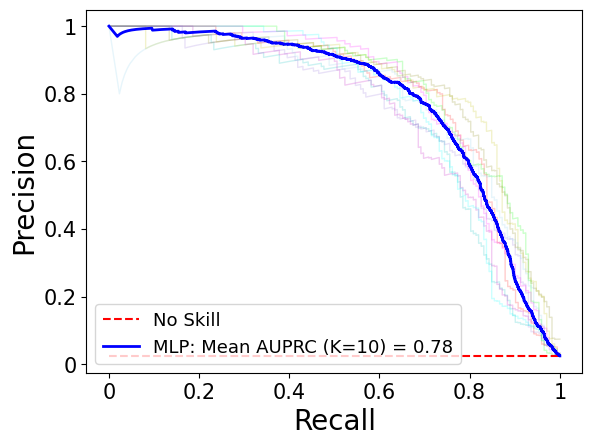

21:80: E501 line too long (81 > 79 characters)
22:80: E501 line too long (83 > 79 characters)
30:1: W293 blank line contains whitespace
49:80: E501 line too long (90 > 79 characters)
50:80: E501 line too long (83 > 79 characters)
52:41: E128 continuation line under-indented for visual indent
52:80: E501 line too long (88 > 79 characters)
53:41: E128 continuation line under-indented for visual indent
54:80: E501 line too long (85 > 79 characters)
59:80: E501 line too long (93 > 79 characters)
60:80: E501 line too long (105 > 79 characters)
65:80: E501 line too long (96 > 79 characters)
67:80: E501 line too long (82 > 79 characters)
72:80: E501 line too long (89 > 79 characters)
80:1: W293 blank line contains whitespace
85:1: W293 blank line contains whitespace
86:80: E501 line too long (86 > 79 characters)
90:80: E501 line too long (80 > 79 characters)
93:80: E501 line too long (91 > 79 characters)
95:80: E501 line too long (93 > 79 characters)
102:80: E501 line too long (83 > 79 charac

In [255]:
# Use the MLP neural network model with the same cross-validation strategy

# Import required packages for the PR curve
from sklearn.metrics import average_precision_score, precision_recall_curve
from sklearn.metrics import f1_score

# Import the package for adjusting class weights for the neural net
from sklearn.utils import compute_class_weight

# Set plot font to Halvetica
plt.rc('font', family='Helvetica')

# Set random seed for numpy and tensorflow
RANDOM_SEED = 5
np.random.seed(RANDOM_SEED)
tf.random.set_seed(RANDOM_SEED)

# Make sure matplotlib settings are reset
plt.style.use('default')

# Define the colors to be used for the 10 folds as they are drawn on the PR curve
colors = ["lightblue", "r", "c", "m", "y", "lime", "mediumpurple", "olive", "aqua",
          "magenta", "skyblue", "yellowgreen", "gold", "tan", "silver"]

# Cross-validation for loop
MLP_y_real = []
MLP_y_proba = []
num = 0
for k in range(1, 11):

    # Print fold number
    print("Fold " + str(num+1) + ":")

    # Read in the fetures and labels for the train and test sets read earlier
    X_train = vars()['fold_' + str(k) + "_X_train"]
    y_train = vars()['fold_' + str(k) + "_y_train"]
    X_test = vars()['fold_' + str(k) + "_X_test"]
    y_test = vars()['fold_' + str(k) + "_y_test"]

    # Update num
    num += 1

    # Convert the dataframes to numpy arrays for machine learning
    X_3_all_Augmented_train = X_train.values
    y_3_all_Augmented_train = y_train.values
    X_3_all_Augmented_test = X_test.values
    y_3_all_Augmented_test = y_test.values

    # There is still a slight imbalance in the train set so adjust the weights accordingly
    y_3_all_Augmented_train_list = [x[0] for x in y_3_all_Augmented_train.tolist()]
    class_weights = compute_class_weight(class_weight="balanced",
                                        classes=np.unique(y_3_all_Augmented_train_list),
                                        y=y_3_all_Augmented_train_list)
    class_weights = dict(zip(np.unique(y_3_all_Augmented_train_list), class_weights))
    print("Class weights:")
    print(class_weights)
    print()

    # Fit the model on the training set and predict probabilities for the train and test sets
    MLP_fit = MLP_model.fit(X_3_all_Augmented_train, y_3_all_Augmented_train, class_weight=class_weights)
    MLP_test_probas = MLP_model.predict_proba(X_3_all_Augmented_test)
    MLP_train_probas = MLP_model.predict_proba(X_3_all_Augmented_train)

    # Compute PR and area under the curve
    precision, recall, _ = precision_recall_curve(y_3_all_Augmented_test, MLP_test_probas[:, 1])

    # Plot each individual PR Curve and append to MLP_y_real and MLP_y_proba lists
    plt.plot(recall, precision, color=colors[num], lw=1, alpha=0.2)
    MLP_y_real.append(y_3_all_Augmented_test)
    MLP_y_proba.append(MLP_test_probas[:, 1])

    # Get model class predictions instead of probabilities to show the confusion matrices
    prediction_classes_test = MLP_model.predict(X_3_all_Augmented_test)
    prediction_classes_train = MLP_model.predict(X_3_all_Augmented_train)

    # Draw confusion matrix of the model performance on the train set
    cm = confusion_matrix(y_3_all_Augmented_train, prediction_classes_train)
    print("Confusion matrix on the test set:")
    print(cm)

    # Draw confusion matrix of the model performance on the test set
    cm = confusion_matrix(y_3_all_Augmented_test, prediction_classes_test)
    print("Confusion matrix on the test set:")
    print(cm)

    # Print F1 score and average prevision score for train and test sets in each round
    print("F1 score test:")
    print(round(f1_score(y_3_all_Augmented_test, prediction_classes_test), 2))
    print("F1 score train:")
    print(round(f1_score(y_3_all_Augmented_train, prediction_classes_train), 2))
    print()
    print("Test AVG precision score:")
    print(round(average_precision_score(y_3_all_Augmented_test, MLP_test_probas[:, 1]), 2))
    print("Train AVG precision score:")
    print(round(average_precision_score(y_3_all_Augmented_train, MLP_train_probas[:, 1]), 2))
    print()
    print("*******************")
    print()

# Plot the no skill line on the bottom of the PR curve
no_skill = len(y_all_4_CV[y_all_4_CV == 1]) / len(y_all_4_CV)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill', color='r')

# Concatenate all MLP_y_real and MLP_y_proba arrays for drawing of the mean curve
MLP_y_real = np.concatenate(MLP_y_real)
MLP_y_proba = np.concatenate(MLP_y_proba)

# Calculate mean precision and recall for drawing the PR curve in the next step
MLP_precision, MLP_recall, thresholds = precision_recall_curve(MLP_y_real, MLP_y_proba)

# Plot the mean PR curve
plt.plot(MLP_recall, MLP_precision, color='b',
             label=r'MLP: Mean AUPRC (K=10) = %0.2f' % (average_precision_score(MLP_y_real, MLP_y_proba)),
             lw=2, alpha=1)

# Set aspect ratio
axes = plt.gca()
axes.set_aspect(0.75)

# Remove the gridlines
plt.grid(visible=False)


# Set x-axis and y-axis ticks
tick_list = [0, 0.2, 0.4, 0.6, 0.8, 1]
plt.xticks(tick_list, tick_list, fontsize=15)
plt.yticks(tick_list, tick_list, fontsize=15)
plt.xlabel('Recall', fontsize=20)
plt.ylabel('Precision', fontsize=20)
plt.legend(loc="lower left", fontsize=13)


# Save the PR curve
plt.savefig(os.getcwd()[0:-18] + '/Figures/PRC_Augmented_ROBIN_RNA_vs_BindingDB_MLP.png', dpi=600, bbox_inches="tight")

# Show the plot
plt.show()

In [258]:
# Test the performance of the MLP model on the holdout/test set and report relevant metrics

# Import packages required for calculation of different metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import average_precision_score
from sklearn.metrics import roc_auc_score

# Set random seed for numpy and tensorflow
RANDOM_SEED = 5
np.random.seed(RANDOM_SEED)
tf.random.set_seed(RANDOM_SEED)

# Print initial shape of df_all_3 for reference
print("Shape of df_all_3:")
print(df_all_3.shape)
print()

'''
The same strategy as cross validation is used here but instead of a cross validation test set, X_all_4_holdout
contains compounds of the test set.
'''

'''
The standardization strategy is different here. Earlier, for both train and test sets, we used features from the
df_all_3_name_label_standardized matrix which was the entire df_all_3 standardized. This approach was used
to ensure we have the same standardization of features for all cross validation folds. For testing on the holdout
set here, we standardize the train set separately from the test set to ensure no leakage occurs from the test
set being standardized in the same set as the train set. We do this by taking feature values directly from
df_all_3 and standardizing after the train/test split.
'''


# RNA compounds to exclude fron the training set
test_set_compounds = X_all_4_holdout[:, 0].tolist()
test_set_RNA_compounds = [item for item in test_set_compounds if item[0:9] != "BindingDB"]
test_set_RNA_compounds_expanded = []
for item in test_set_RNA_compounds:
    test_set_RNA_compounds_expanded.append(item)
    item_expanded = ROBIN_Augment_dict[item]
    for thing in item_expanded:
        test_set_RNA_compounds_expanded.append(thing)
test_set_RNA_compounds_expanded_set = list(set(test_set_RNA_compounds_expanded))

# BindingDB compounds to exclude fron the training set
test_set_BindingDB = [item for item in test_set_compounds if item[0:9] == "BindingDB"]

# BindingDB and RNA binders to be excluded from the train set combined into one set
test_set_RNA_expanded_and_BindingDB = test_set_BindingDB + test_set_RNA_compounds_expanded_set

# Remove from df_all_3_name_label_standardized_train BindingDB compounds from the test set
# Also remove from df_all_3_name_label_standardized_train tes set ROBIN RNA binders and their analogues
df_all_3_train = df_all_3.loc[~df_all_3['name'].isin(test_set_RNA_expanded_and_BindingDB)]
# df_all_3_name_label_standardized_train is the train set

# Print shape of the train set and the number of protein and RNA binders within it
print("Shape of the augmented train set:")
print(df_all_3_train.shape)
y_all_3_train_labels_list = df_all_3_train.values[:, -1].tolist()
y_all_3_train_labels_list = [1 if x == "RNA Binding" else x for x in y_all_3_train_labels_list]
y_all_3_train_labels_list = [0 if x == "Protein Binding" else x for x in y_all_3_train_labels_list]
print("Number of protein binders:")
print(int(len(y_all_3_train_labels_list) - sum(y_all_3_train_labels_list)))
print("Number of RNA binders:")
print(int(sum(y_all_3_train_labels_list)))
print()

# Extract from df_all_3_name_label_standardized the test set compounds belonging to BindingDB and ROBIN RNA binders
test_set_RNA_and_BindingDB = test_set_RNA_compounds + test_set_BindingDB
df_all_3_test = df_all_3.loc[df_all_3['name'].isin(test_set_RNA_and_BindingDB)]
df_all_3_test.drop_duplicates(subset=['name'], keep="first", inplace=True)
# df_all_3_name_label_standardized_test is the test set
# Test set compounds are extracted again from df_all_3_name_label_standardized to ensure standardization of train and test sets are the same

# Print shape of the test set and the number of protein and RNA binders within it
print("Shape of the test set:")
print(df_all_3_test.shape)
y_all_3_test_labels_list = df_all_3_test.values[:, -1].tolist()
y_all_3_test_labels_list = [1 if x == "RNA Binding" else x for x in y_all_3_test_labels_list]
y_all_3_test_labels_list = [0 if x == "Protein Binding" else x for x in y_all_3_test_labels_list]
print("Number of protein binders:")
print(int(len(y_all_3_test_labels_list) - sum(y_all_3_test_labels_list)))
print("Number of RNA binders:")
print(int(sum(y_all_3_test_labels_list)))
print()


# Prepare the X_train matrix and standardize as described earlier
X_3_all_Augmented_train = df_all_3_train.values[:, 1:-1]
X_3_all_Augmented_train = X_3_all_Augmented_train.astype('float64')
sc = StandardScaler()
sc.fit(X_3_all_Augmented_train)
X_3_all_Augmented_train = sc.transform(X_3_all_Augmented_train)
print("Shape of X_3_all_Augmented_train matrix:")
print(X_3_all_Augmented_train.shape)
print()

# Prepare the X_test matrix and standardize as described earlier
X_3_all_Augmented_test = df_all_3_test.values[:, 1:-1]
X_3_all_Augmented_test = X_3_all_Augmented_test.astype('float64')
X_3_all_Augmented_test = sc.transform(X_3_all_Augmented_test)
print("Shape of X_3_all_Augmented_test matrix:")
print(X_3_all_Augmented_test.shape)
print()


# Prepare the y_train and y_test matrices
y_3_all_Augmented_train = y_all_3_train_labels_list
y_3_all_Augmented_test = y_all_3_test_labels_list

# Adjust class weights for the MLP model
class_weights = compute_class_weight(class_weight="balanced",
                                        classes=np.unique(y_3_all_Augmented_train),
                                        y=y_3_all_Augmented_train)
class_weights = dict(zip(np.unique(y_3_all_Augmented_train), class_weights))
print("Class_weights:")
print(class_weights)

# Fit MLP model on the train set
MLP_fit = MLP_model.fit(X_3_all_Augmented_train, y_3_all_Augmented_train, class_weight=class_weights)

# Calculate probabilities for the test set
prediction_probs = MLP_model.predict_proba(X_3_all_Augmented_test)[:, 1]

# Calculate classes for the test set
prediction_classes = MLP_model.predict(X_3_all_Augmented_test)

# Calculate confusion matrix
cm = confusion_matrix(y_3_all_Augmented_test, prediction_classes)
print("Confusion matrix on the holdout set:")
print(cm)
print()

# Calculate average precision score
AUPRC_score_holdout = average_precision_score(y_3_all_Augmented_test, prediction_probs)
print("AUPRC score on the holdout set:")
print(round(AUPRC_score_holdout, 2))
print()

# Calculate F1 score
f1_score_holdout = f1_score(y_3_all_Augmented_test, prediction_classes)
print("F1 score on the holdout set:")
print(round(f1_score_holdout, 2))
print()

# Calculate AUROC score
AUROC_score_holdout = roc_auc_score(y_3_all_Augmented_test, prediction_probs)
print("AUROC score on the holdout set:")
print(round(AUROC_score_holdout, 2))
print()

# Calculate Cohen's kappa
cohen_kappa_score_holdout = cohen_kappa_score(y_3_all_Augmented_test, prediction_classes)
print("Cohen’s kappa score on the holdout set:")
print(round(cohen_kappa_score_holdout, 2))
print()

# Calculate Matthews correlation coefficient (MCC)
matthews_corrcoef_holdout = matthews_corrcoef(y_3_all_Augmented_test, prediction_classes)
print("Matthews correlation coefficient on the holdout set:")
print(round(matthews_corrcoef_holdout, 2))
print()

Shape of df_all_3:
(136950, 1667)

Shape of the augmented train set:
(122466, 1667)
Number of protein binders:
69910
Number of RNA binders:
52556

Shape of the test set:
(7959, 1667)
Number of protein binders:
7768
Number of RNA binders:
191

Shape of X_3_all_Augmented_train matrix:
(122466, 1665)

Shape of X_3_all_Augmented_test matrix:
(7959, 1665)

Class_weights:
{0: 0.8758832785009297, 1: 1.1651000837202223}
Epoch 1/7
60/60 [==============================] - 1s 15ms/step - loss: 0.2726 - auc: 0.9568
Epoch 2/7
60/60 [==============================] - 1s 15ms/step - loss: 0.1064 - auc: 0.9938
Epoch 3/7
60/60 [==============================] - 1s 15ms/step - loss: 0.0650 - auc: 0.9974
Epoch 4/7
60/60 [==============================] - 1s 15ms/step - loss: 0.0465 - auc: 0.9987
Epoch 5/7
60/60 [==============================] - 1s 15ms/step - loss: 0.0361 - auc: 0.9991
Epoch 6/7
60/60 [==============================] - 1s 15ms/step - loss: 0.0298 - auc: 0.9994
Epoch 7/7
4/4 [===========

1:80: E501 line too long (91 > 79 characters)
22:80: E501 line too long (110 > 79 characters)
27:80: E501 line too long (112 > 79 characters)
28:80: E501 line too long (106 > 79 characters)
29:80: E501 line too long (113 > 79 characters)
30:80: E501 line too long (109 > 79 characters)
31:80: E501 line too long (106 > 79 characters)
38:80: E501 line too long (90 > 79 characters)
45:80: E501 line too long (80 > 79 characters)
48:80: E501 line too long (86 > 79 characters)
50:80: E501 line too long (83 > 79 characters)
51:80: E501 line too long (94 > 79 characters)
53:80: E501 line too long (90 > 79 characters)
54:80: E501 line too long (103 > 79 characters)
55:80: E501 line too long (90 > 79 characters)
58:80: E501 line too long (82 > 79 characters)
62:80: E501 line too long (95 > 79 characters)
63:80: E501 line too long (99 > 79 characters)
70:80: E501 line too long (115 > 79 characters)
75:80: E501 line too long (140 > 79 characters)
77:80: E501 line too long (81 > 79 characters)
81:80

F1 score on the holdout set:
0.68

AUROC score on the holdout set:
0.97

Cohen’s kappa score on the holdout set:
0.67

Matthews correlation coefficient on the holdout set:
0.67



## Test MLP on four RNA binders and four protein binders from the literature

In [18]:
# Extract df_all_3 column names and their median feature value as a dictionary to fill nan values of the test matrix

df_all_3_values = df_all_3.iloc[:, 1:-1] 
df_all_3_features = df_all_3_values.columns.tolist()
d_df_all_3_feature_medians = {}
for item in df_all_3_features:
    d_df_all_3_feature_medians[item] = df_all_3_values[item].median()
d_df_all_3_feature_medians

{'ABC': 21.28215312081772,
 'ABCGG': 16.601492998122048,
 'nAcid': 0.0,
 'nBase': 1.0,
 'SpAbs_A': 35.3129364,
 'SpMax_A': 2.461567899,
 'SpDiam_A': 4.858647582210274,
 'SpAD_A': 35.3129364,
 'SpMAD_A': 1.2956347875,
 'LogEE_A': 4.239599117,
 'VE1_A': 4.22968955,
 'VE2_A': 0.156240011,
 'VE3_A': 2.44270189,
 'VR1_A': 347.2812216,
 'VR2_A': 12.23517467,
 'VR3_A': 6.890899666,
 'nAromAtom': 15.0,
 'nAromBond': 16.0,
 'nAtom': 51.0,
 'nHeavyAtom': 27.0,
 'nSpiro': 0.0,
 'nBridgehead': 0.0,
 'nHetero': 7.0,
 'nH': 23.0,
 'nB': 0.0,
 'nC': 20.0,
 'nN': 3.0,
 'nO': 2.0,
 'nS': 0.0,
 'nP': 0.0,
 'nF': 0.0,
 'nCl': 0.0,
 'nBr': 0.0,
 'nI': 0.0,
 'nX': 0.0,
 'ATS0dv': 364.0,
 'ATS1dv': 361.0,
 'ATS2dv': 526.0,
 'ATS3dv': 510.0,
 'ATS4dv': 468.6666667,
 'ATS5dv': 423.0,
 'ATS6dv': 379.0,
 'ATS7dv': 328.66666666666663,
 'ATS8dv': 277.03703703703707,
 'ATS0d': 168.0,
 'ATS1d': 213.0,
 'ATS2d': 341.0,
 'ATS3d': 383.0,
 'ATS4d': 374.0,
 'ATS5d': 350.0,
 'ATS6d': 326.0,
 'ATS7d': 296.0,
 'ATS8d': 258

In [22]:
# Test the performance of the neural net on several cases from the scientific literature

# Read in Mordred features of the test compounds
df_Mordred_extra = pd.read_csv(os.getcwd()[0:-18] + "Supplemental_files/Mordred_files/Mordred_Test_Compounds_3D.csv")
# Take the compound names as a list as they will be used later
Mordred_extra_names = df_Mordred_extra["name"].tolist()
# Remove the name column
df_Mordred_extra_no_name = df_Mordred_extra.iloc[:, 1:]
# Only keep features of test compounds that also exist in df_all_3
features = df_all_3.columns.tolist()[1:-1]
for item in df_Mordred_extra_no_name:
    if item not in features:
        df_Mordred_extra_no_name = df_Mordred_extra_no_name.drop(item, axis=1)

# Replace infinity in the feature values by nan values
df_Mordred_extra_no_name.replace([np.inf, -np.inf], np.nan, inplace=True)     

# Fill nan values of the test matrix with median of df_all_3 columns
for i in range(8):
    for item in features:
        if np.isnan(df_Mordred_extra_no_name.at[i, item]) == True:
            df_Mordred_extra_no_name.at[i, item] = d_df_all_3_feature_medians[item]
            
df_Mordred_extra_no_name


,ABC,ABCGG,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,SpMAD_A,LogEE_A,...,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
0,32.697969,21.600512,0,0,53.266320,2.535517,4.951115,53.266320,1.331658,4.658581,...,10.871099,94.294166,540.102961,9.644696,6054,75,232.0,286.0,12.000000,8.333333
1,18.966332,15.550824,0,0,29.660194,2.474341,4.823314,29.660194,1.235841,4.115350,...,10.181233,73.176731,351.065318,9.751814,1391,38,130.0,153.0,9.201389,5.027778
2,21.241713,16.020566,0,1,35.725953,2.403320,4.792133,35.725953,1.323183,4.233444,...,10.113384,75.174897,382.157580,7.799134,2021,39,142.0,165.0,7.138889,5.972222
3,25.416672,21.303532,0,1,38.989563,2.676186,5.352371,38.989563,1.218424,4.419651,...,11.001783,69.521365,445.160542,7.809834,2350,76,186.0,239.0,14.680556,6.666667
4,29.198227,19.516970,0,2,49.161634,2.372244,4.744487,49.161634,1.328693,4.541483,...,10.415502,73.587263,494.266285,7.163279,5324,56,194.0,224.0,9.972222,8.083333
5,26.805756,19.185768,0,0,45.149909,2.538045,4.923438,45.149909,1.327938,4.467470,...,10.481701,84.821561,440.196074,7.722738,3665,56,182.0,217.0,9.222222,7.527778
6,22.374448,18.015057,0,0,36.166453,2.476482,4.952965,36.166453,1.247119,4.284712,...,10.291230,64.526738,404.256274,6.219327,2246,47,150.0,175.0,10.972222,6.388889
7,16.199155,13.295586,1,0,26.927238,2.535864,4.933973,26.927238,1.346362,3.994834,...,10.161882,73.059238,265.109485,8.033621,676,39,114.0,141.0,5.388889,4.277778


In [28]:
# Perform standardization on the train(the entire df_all_3 dataset) and test (12 compounds) sets.

# Import standardization package
from sklearn.preprocessing import StandardScaler

# remove name column from df_all_3
df_all_3_no_name = df_all_3.iloc[:, 1:]

# Convert both df_all_3 and test dataframes to numpy arrays for ML
X_all_3 = df_all_3_no_name.values[:, :-1]
X_extra_test = df_Mordred_extra_no_name.values
y_all_3 = df_all_3_no_name.iloc[:, -1].tolist()

#print shapes of X_all_3, y_all_3, and X_extra_test
print (X_all_3.shape)
print (X_extra_test.shape)
print (len(y_all_3))
print ()

# Standardize X_all_3
X_all_3 = X_all_3.astype('float64')
sc = StandardScaler()
sc.fit(X_all_3)
X_all_3 = sc.transform(X_all_3)

# Standardize X_extra_test using the X_all_3 scaling
# Train and test sets are stadardized separately again to prevent data leakage
X_extra_test = sc.transform(X_extra_test)

# Prepare y_all_3
y_all_3 = [1 if x=="RNA Binding" else x for x in y_all_3]
y_all_3 = [0 if x=="Protein Binding" else x for x in y_all_3]
y_all_3 = np.array(y_all_3)
print ("done")

(136950, 1665)
(8, 1665)
136950

done


In [32]:
# The neural network MLP model (same as before) is repeated here for reference.

# Import the neural network packages
import tensorflow as tf
from tensorflow import keras
from keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras import Sequential
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import regularizers

# Define the neural network MLP model and wrap it in the scikitlearn pipeline for easier use

# Define neural network as function
def create_model():

    # create model
    model = Sequential()

    # Define number of features
    number_of_features = 1665

    # Hidden layers
    model.add(layers.Dense(units=200, activation='relu', kernel_regularizer=regularizers.l2(0.00001),
                           input_shape=(number_of_features,)))

    model.add(layers.Dense(units=200, activation='relu', kernel_regularizer=regularizers.l2(0.00001)))

    # Output layer
    model.add(layers.Dense(units=1, activation='sigmoid'))

    # Compile model
    model.compile(loss='binary_crossentropy',  # Cross-entropy
                  optimizer='Adam',  # Use Adam optimizer
                  metrics=['AUC'])
    return model


# Wrap within the scikitlearn framework
MLP_model = KerasClassifier(create_model, epochs=7, batch_size=2048, verbose=1)

In [35]:
# Train the MLP model on X_all_3 and y_all_3 and test on X_extra_test

# Set random seed for numpy and tensorflow
RANDOM_SEED = 5
np.random.seed(RANDOM_SEED)
tf.random.set_seed(RANDOM_SEED)

# Make sure the slight imbalance in the training set is accounted for in the neural network
class_weights = compute_class_weight(class_weight = "balanced",
                                        classes = np.unique(y_all_3),
                                        y = y_all_3)
class_weights = dict(zip(np.unique(y_all_3), class_weights))
print (class_weights)


# Fit the MLP model to the training set
MLP_fit = MLP_model.fit(X_all_3, y_all_3)

# Predict probabilities for X_extra_test
prediction_extra = MLP_model.predict_proba(X_extra_test)

# Print compound name followed by the probability predicted by model
for i in range(len(prediction_extra)):
    print (Mordred_extra_names[i])
    print (round(prediction_extra[i][1]*100, 1))
    print ()

{0: 0.8815237261515487, 1: 1.1552672425428532}
Epoch 1/7
67/67 [==============================] - 1s 15ms/step - loss: 0.2569 - auc: 0.9620
Epoch 2/7
67/67 [==============================] - 1s 14ms/step - loss: 0.1003 - auc: 0.9945
Epoch 3/7
67/67 [==============================] - 1s 14ms/step - loss: 0.0641 - auc: 0.9976
Epoch 4/7
67/67 [==============================] - 1s 14ms/step - loss: 0.0465 - auc: 0.9987
Epoch 5/7
67/67 [==============================] - 1s 14ms/step - loss: 0.0384 - auc: 0.9991
Epoch 6/7
67/67 [==============================] - 1s 14ms/step - loss: 0.0311 - auc: 0.9994
Epoch 7/7
1/1 [==============================] - 0s 943us/step
ADQ
100.0

HIV TAR compound 4
100.0

Ribocil-A
98.4

Tetracycline
91.6

Imatinib
0.0

Ibrutinib
2.4

Lovastatin
0.0

Nevirapine
0.0



## SHAP Analysis

In [36]:
#Run the model on the entire dataset in preparation for the SHAP analysis

model = Sequential()
number_of_features = 1665

model.add(layers.Dense(units=200, activation='relu', kernel_regularizer=regularizers.l2(0.00001),input_shape=(number_of_features,)))

model.add(layers.Dense(units=200, activation='relu', kernel_regularizer=regularizers.l2(0.00001)))

model.add(layers.Dense(units=1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', 
              optimizer='Adam', 
                  metrics=['AUC'])

history = model.fit(X_all_3, y_all_3, epochs=7, batch_size=2048, verbose=1) 


Epoch 1/7
67/67 [==============================] - 1s 14ms/step - loss: 0.2593 - auc: 0.9613
Epoch 2/7
67/67 [==============================] - 1s 14ms/step - loss: 0.1033 - auc: 0.9941
Epoch 3/7
67/67 [==============================] - 1s 14ms/step - loss: 0.0657 - auc: 0.9974
Epoch 4/7
67/67 [==============================] - 1s 14ms/step - loss: 0.0462 - auc: 0.9987
Epoch 5/7
67/67 [==============================] - 1s 14ms/step - loss: 0.0359 - auc: 0.9992
Epoch 6/7
67/67 [==============================] - 1s 14ms/step - loss: 0.0297 - auc: 0.9995
Epoch 7/7
67/67 [==============================] - 1s 14ms/step - loss: 0.0266 - auc: 0.9996


In [104]:
#Perform SHAP to interpret the neural network model

# Import shap package
import shap

#initialize
shap.initjs()

#define the background 
background = X_all_3[np.random.choice(X_all_3.shape[0], 1000, replace=False)]

#use the deepexplainer package within SHAP tailored for use in neural networks
e = shap.DeepExplainer(model, background)

#calculate SHAP values
shap_values = e.shap_values(X_all_3)

#print SHAP values
print(shap_values)

Instructions for updating:
Simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.
[array([[-1.67328058e-03, -3.31644028e-04, -1.62170445e-04, ...,
        -2.63253484e-03, -1.86178959e-03, -6.88549785e-04],
       [ 7.02254052e-05, -3.97125553e-04, -9.64924258e-05, ...,
        -1.89233026e-03, -2.28945053e-03, -5.12758048e-04],
       [-1.12533439e-03, -1.54357879e-03,  9.06530641e-05, ...,
        -1.97850634e-03, -3.03207534e-03, -2.34928142e-04],
       ...,
       [ 5.17861956e-04,  6.49204983e-04, -1.40028720e-04, ...,
         2.02461214e-03,  2.46791387e-03,  2.99560700e-04],
       [ 5.17861956e-04,  6.49204983e-04, -1.40028720e-04, ...,
         2.02461214e-03,  2.46791387e-03,  2.99560700e-04],
       [ 5.17861956e-04,  6.49204983e-04, -1.40028720e-04, ...,
         2.02461214e-03,  2.46791387e-03,  2.99560700e-04]])]


In [105]:
# Save SHAP values to CSV as the SHAP code takes a long time to run
df_shap_save = pd.DataFrame(shap_values[0])
df_shap_save.to_csv(os.getcwd()[0:-18] + "/Supplemental_files/ML_CSVs/SHAP_values.csv")

In [38]:
# Read back in the saved CSV containing the SHAP values
df_SHAP_array = pd.read_csv(os.getcwd()[0:-18] + "/Supplemental_files/ML_CSVs/Shap_values.csv")
df_SHAP_array = df_SHAP_array.drop('Unnamed: 0', axis=1)
df_SHAP_array = df_SHAP_array.to_numpy()
print(df_SHAP_array.shape)
df_SHAP_array

(136950, 1665)


array([[-1.67328058e-03, -3.31644028e-04, -1.62170445e-04, ...,
        -2.63253484e-03, -1.86178959e-03, -6.88549785e-04],
       [ 7.02254052e-05, -3.97125553e-04, -9.64924258e-05, ...,
        -1.89233026e-03, -2.28945053e-03, -5.12758048e-04],
       [-1.12533439e-03, -1.54357879e-03,  9.06530641e-05, ...,
        -1.97850634e-03, -3.03207534e-03, -2.34928142e-04],
       ...,
       [ 5.17861956e-04,  6.49204983e-04, -1.40028720e-04, ...,
         2.02461214e-03,  2.46791387e-03,  2.99560700e-04],
       [ 5.17861956e-04,  6.49204983e-04, -1.40028720e-04, ...,
         2.02461214e-03,  2.46791387e-03,  2.99560700e-04],
       [ 5.17861956e-04,  6.49204983e-04, -1.40028720e-04, ...,
         2.02461214e-03,  2.46791387e-03,  2.99560700e-04]])

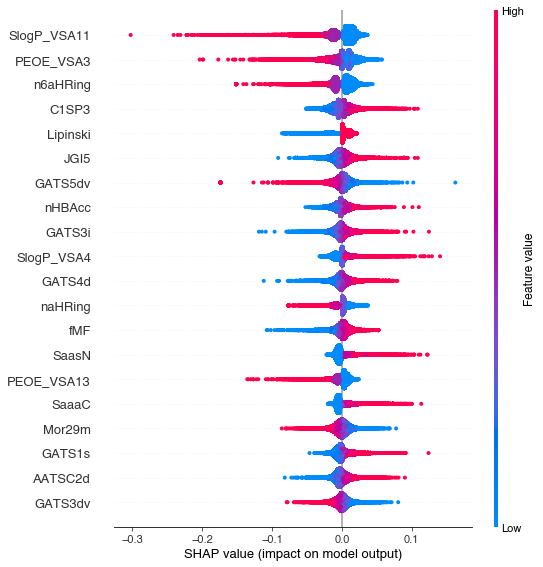

In [39]:
# Draw the SHAP beeswarm plot

# Set plot font to Halvetica
plt.rc('font', family='Helvetica') 

df_SHAP = df_all_3.drop('library', axis=1)
df_SHAP = df_SHAP.drop('name', axis=1)
shap.summary_plot(df_SHAP_array, df_SHAP, show=False)
plt.savefig(os.getcwd()[0:-18] + '/Figures/SHAP_Beeswarm_plot.png', bbox_inches="tight" ,dpi=600)

In [40]:
# Generate the barplot for the SHAP beeswarm plot

shap.summary_plot(shap_values, df_SHAP, show=False)
plt.savefig(os.getcwd()[0:-18] + '/Figures/SHAP_Barplot.png', bbox_inches="tight" ,dpi=600)

NameError: name 'shap_values' is not defined